In [53]:
!pip3 install yfinance
!pip3 install pandas_datareader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime
import yfinance as yfin
from pandas_datareader import data as pdr
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

Looking in indexes: http://mirrors.tencentyun.com/pypi/simple/
Looking in indexes: http://mirrors.tencentyun.com/pypi/simple/


In [54]:
yfin.pdr_override()

1. Stock selection and data extraction

In [55]:
today = datetime.now()
year_ago = datetime(today.year-1, today.month, today.day)

In [56]:
company_list = ['VITL', 'USAP', 'BLBD', 'ROAD']

In [57]:

for company in company_list:
    print(company)
    globals()[company] = pdr.get_data_yahoo(company, start= year_ago, end=today)

VITL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

USAP
BLBD



[*********************100%%**********************]  1 of 1 completed

ROAD


In [58]:
VITL.head()

Open   High     Low  Close  Adj Close  Volume
Date                                                      
2023-06-20  13.27  13.27  12.900  12.95      12.95  233400
2023-06-21  12.95  13.09  12.550  13.00      13.00  448900
2023-06-22  13.05  13.31  12.858  13.21      13.21  184500
2023-06-23  13.06  13.59  13.000  13.18      13.18  473000
2023-06-26  13.09  13.22  12.540  12.56      12.56  218400

In [59]:
USAP.head()

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2023-06-20  12.43  13.00  12.43  12.88      12.88   98600
2023-06-21  12.90  13.27  12.53  13.15      13.15   62200
2023-06-22  13.09  13.19  12.15  12.52      12.52   21900
2023-06-23  12.50  12.54  12.04  12.30      12.30   18000
2023-06-26  12.42  13.15  12.31  13.00      13.00   69700

In [60]:
BLBD.head()

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-06-20  22.299999  22.299999  21.320000  21.340000  21.340000  281500
2023-06-21  21.299999  22.700001  21.006001  21.809999  21.809999  432500
2023-06-22  21.860001  22.170000  21.405001  21.570000  21.570000  273200
2023-06-23  21.360001  21.660000  20.870001  21.139999  21.139999  879700
2023-06-26  21.299999  21.610001  20.620001  20.660000  20.660000  298100

In [61]:
ROAD.head()

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-06-20  32.619999  33.500000  32.619999  33.470001  33.470001  181400
2023-06-21  33.160000  34.189999  32.840000  34.180000  34.180000  275400
2023-06-22  33.959999  34.439999  33.360001  33.389999  33.389999  326800
2023-06-23  33.099998  33.099998  32.349998  32.400002  32.400002  410500
2023-06-26  32.279999  33.169998  32.259998  32.500000  32.500000  241200

1.5 -- Data cleaning

In [62]:
VITL.columns= VITL.columns.str.lower()
USAP.columns= USAP.columns.str.lower()
BLBD.columns= BLBD.columns.str.lower()
ROAD.columns= ROAD.columns.str.lower()

In [63]:
VITL.dropna(inplace=True)
USAP.dropna(inplace=True)
BLBD.dropna(inplace=True)
ROAD.dropna(inplace=True)

In [64]:
def detect_and_remove_duplicates(df):
    if df is not None:
        duplicates_count = sum(df.iloc[:, :].duplicated())
        duplicates_percentage = round(100 * duplicates_count / len(df), 1) if len(df) > 0 else 0.0
        print(f'Duplicates in DataFrame: {duplicates_count}, ({duplicates_percentage}%)')
        return df.drop_duplicates(keep='last')
    else:
        return None

VITL = detect_and_remove_duplicates(VITL)
USAP = detect_and_remove_duplicates(USAP)
BLBD = detect_and_remove_duplicates(BLBD)
ROAD = detect_and_remove_duplicates(ROAD)

Duplicates in DataFrame: 0, (0.0%)
Duplicates in DataFrame: 0, (0.0%)
Duplicates in DataFrame: 0, (0.0%)
Duplicates in DataFrame: 0, (0.0%)


2. Time series -- Trend

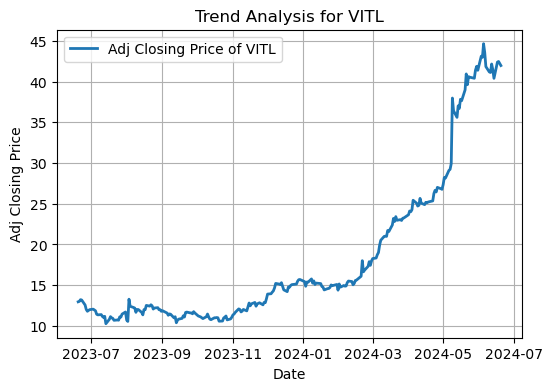

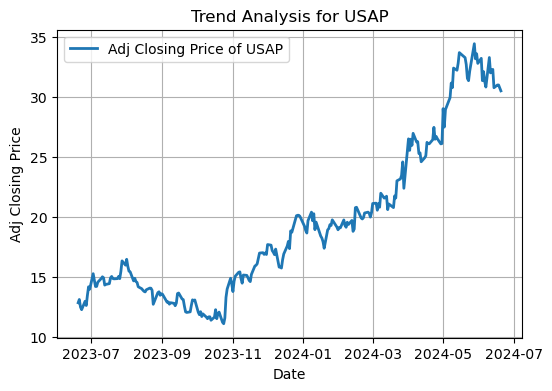

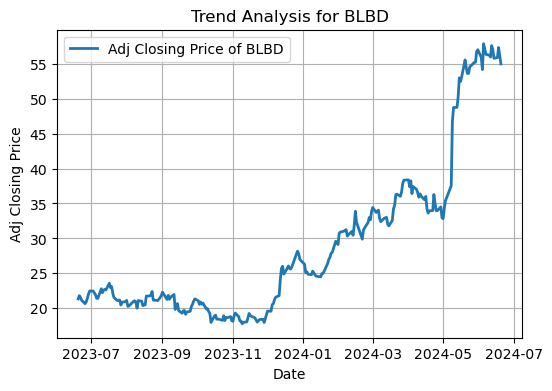

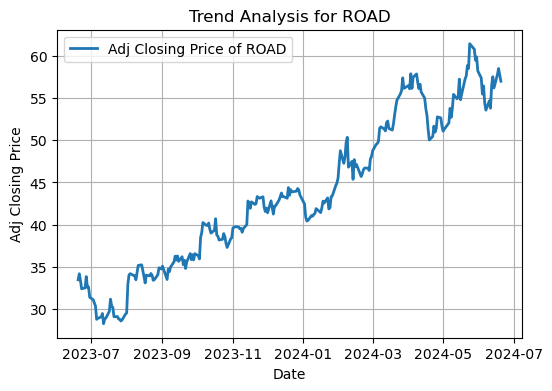

In [65]:
def analyze_trend(company):
    # access data
    data = globals()[company] 

    plt.figure(figsize=(6,4))
    plt.plot(data.index, data['adj close'], label=f'Adj Closing Price of {company}', linewidth=2)
    plt.title(f'Trend Analysis for {company}')
    plt.xlabel('Date')
    plt.ylabel('Adj Closing Price')
    plt.legend()
    plt.grid(True)
    plt.show()

company_list = ['VITL', 'USAP', 'BLBD', 'ROAD']
for company in company_list:
    analyze_trend(company)

提供四个股票的收盘价的整体变化趋势，包含所有的短期和长期波动。

3. time series -- seasonality

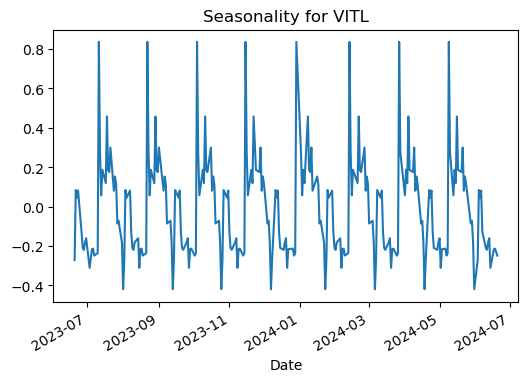

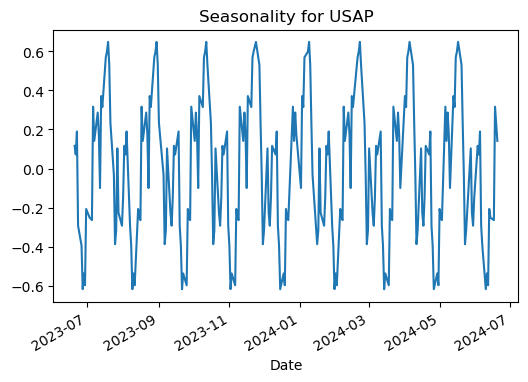

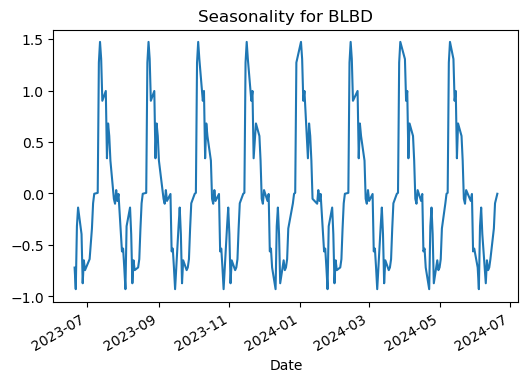

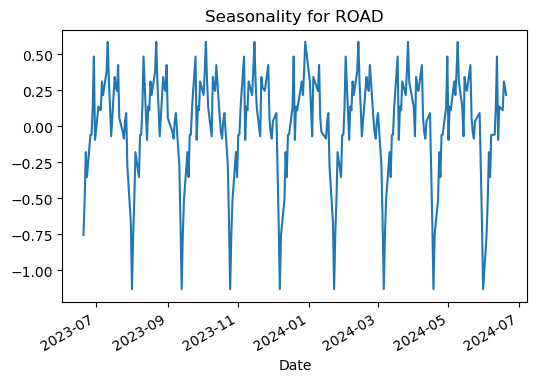

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
def analyze_seasonality(company):
    data = globals().get(company)
    result = seasonal_decompose(data['adj close'],period=30) 
    plt.figure(figsize=(6,4))
    result.seasonal.plot(title=f'Seasonality for {company}')
    plt.xlabel('Date')
    plt.show()

company_list = ['VITL', 'USAP', 'BLBD', 'ROAD']

for company in company_list:
    analyze_seasonality(company)

我们设定数据周期为30天，比如说针对VITL的季节性图，在月初，每个月的前几天，调整后的收盘价有明显的上涨趋势，在每个月的中旬，价格保持相对稳定，在每个月的最后几天，价格有明显的下跌趋势。通过观察这样的季节性图，投资者可以更好地把握买卖时机。例如，可以选择在月末价格较低时买入，在月初价格较高时卖出

4. Time series - seasonality and trend

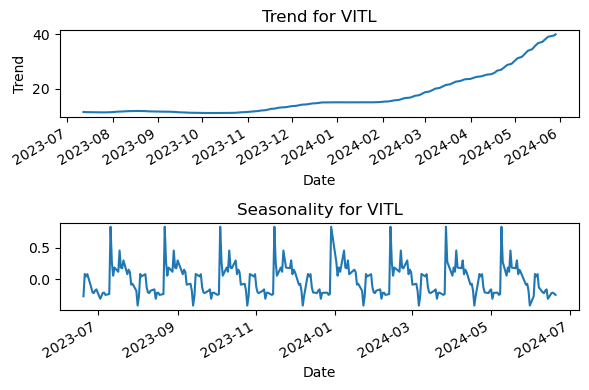

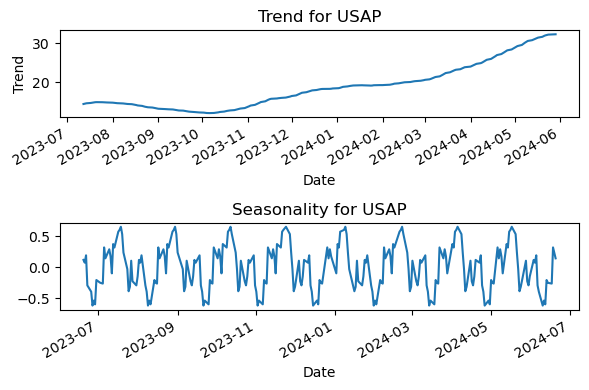

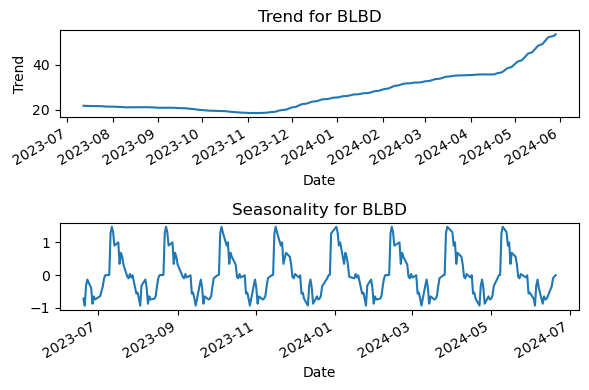

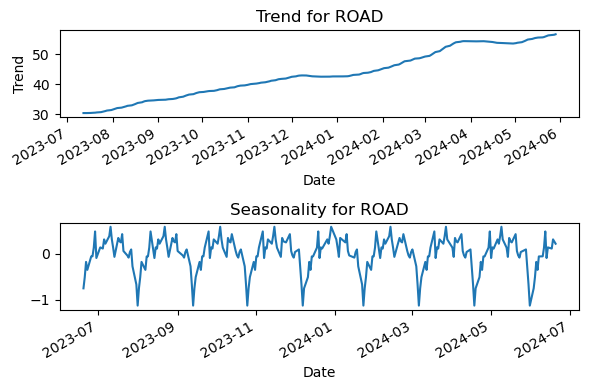

In [67]:
def analyze_seasonality_and_trend(company):
    data = globals().get(company)

    result = seasonal_decompose(data['adj close'], model='additive', period=30) 

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,4))
    result.trend.plot(ax=ax1, title=f'Trend for {company}')
    ax1.set_ylabel('Trend')
    ax1.set_xlabel('Date')
    
    result.seasonal.plot(ax=ax2, title=f'Seasonality for {company}')
    ax2.set_xlabel('Date')
    
    plt.tight_layout()
    plt.show()


company_list = ['VITL', 'USAP', 'BLBD', 'ROAD']

for company in company_list:
    analyze_seasonality_and_trend(company)

因为在season中我们发现每个月的波动幅度相对一致，股票价格在不同季节或时间段的波动幅度没有显著变化，加法模型可以很好地捕捉这种模式。
分解后的趋势图提供了去除短期波动后的长期趋势，季节性图同样提供了数据中的周期性成分
整体上趋势图中VITL股票价格最平滑

5. Time series - noise

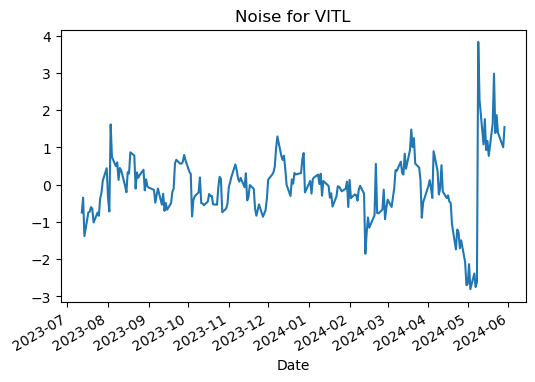

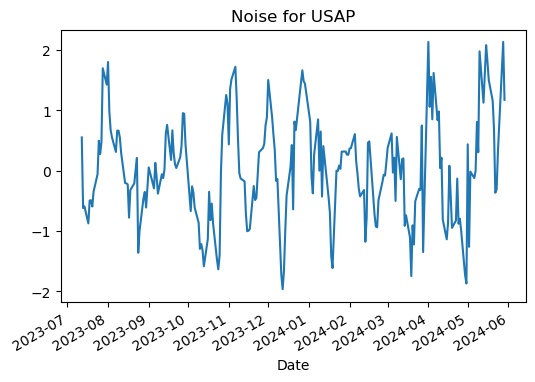

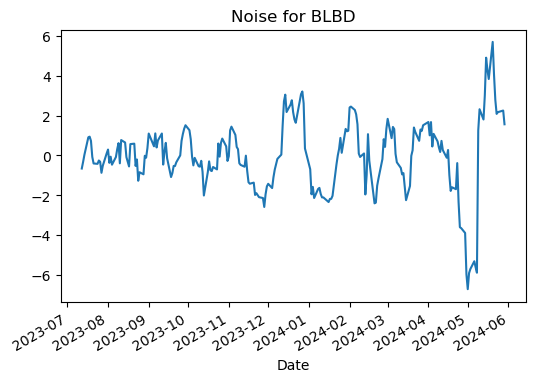

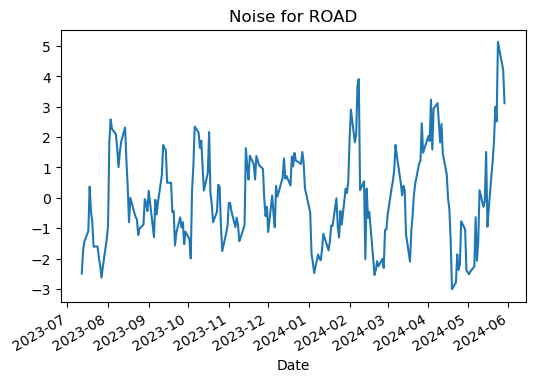

In [68]:
def analyze_noise(company):
    data = globals().get(company)
    result = seasonal_decompose(data['adj close'], period=30) 
    plt.figure(figsize=(6,4))
    result.resid.plot(title=f'Noise for {company}')
    plt.xlabel('Date')
    plt.show()

company_list = ['VITL', 'USAP', 'BLBD', 'ROAD']

for company in company_list:
    analyze_noise(company)

分析指定公司股票数据中的噪声（残差）成分，并绘制噪声图，根据此图我们可以得出结论，USAP和ROAD两个股票的残差异常点较多，峰值较大数量且多，特别是USAP，这两个股票不能被趋势和季节性合理的解释到位，因此较难预测准确，反之VITL和BLBD两个股票数据异常较小，相对预测来说更加稳定

6. Time series -- noise overall summary

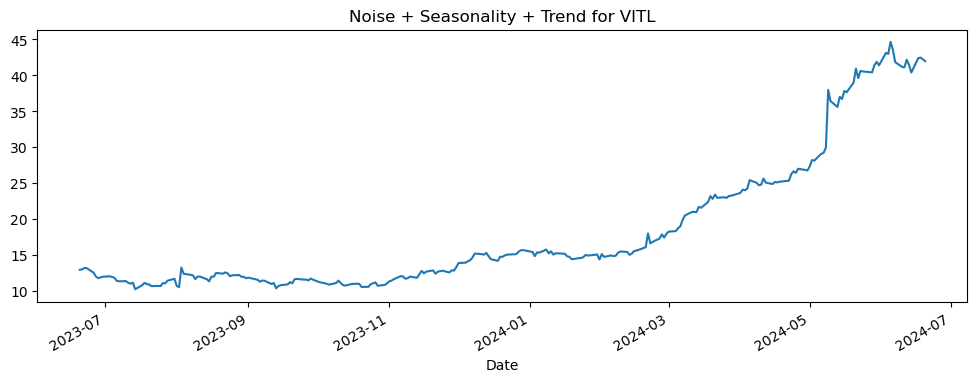

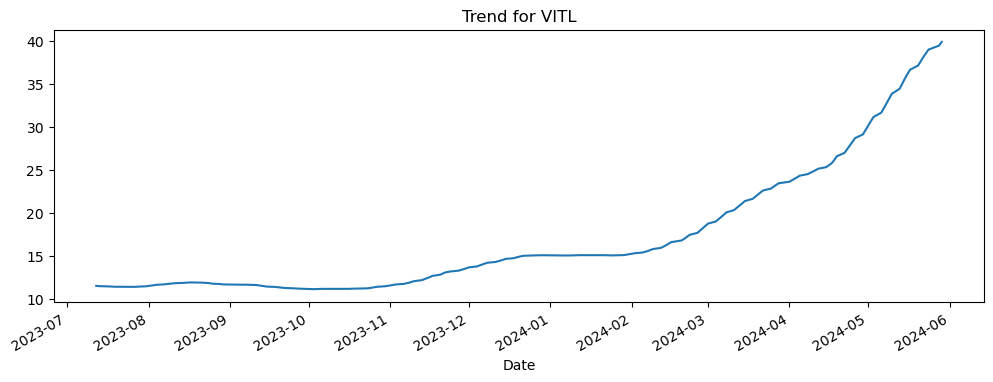

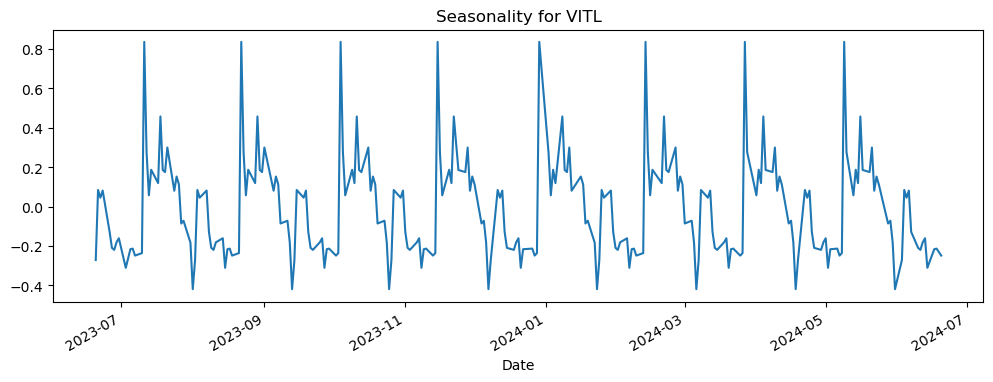

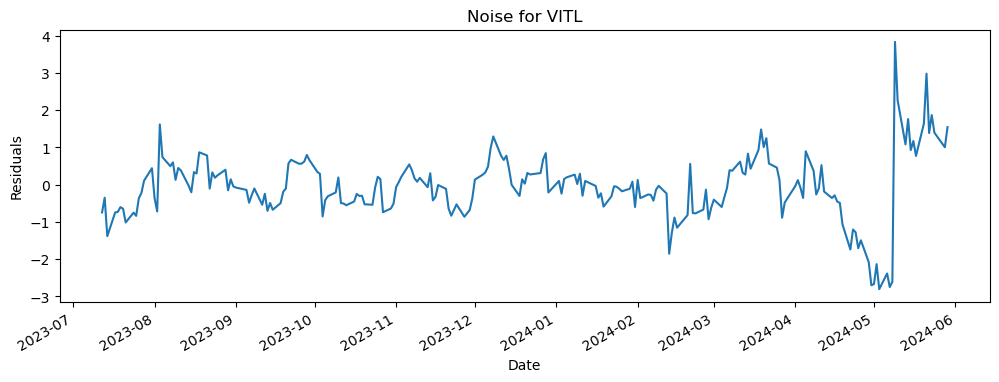

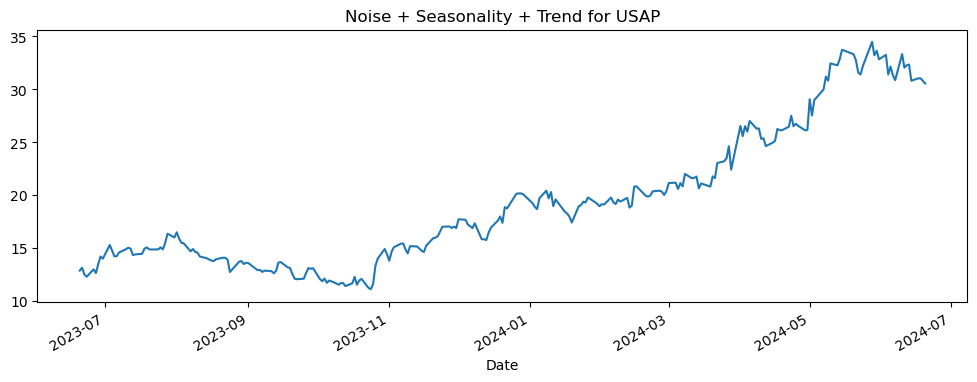

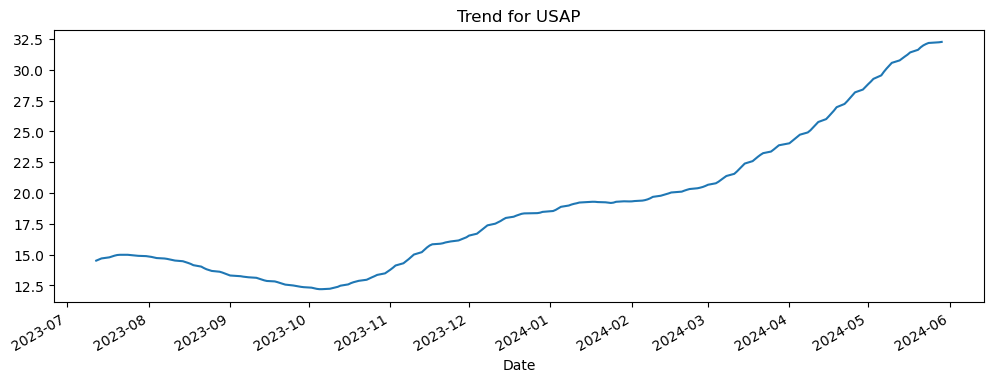

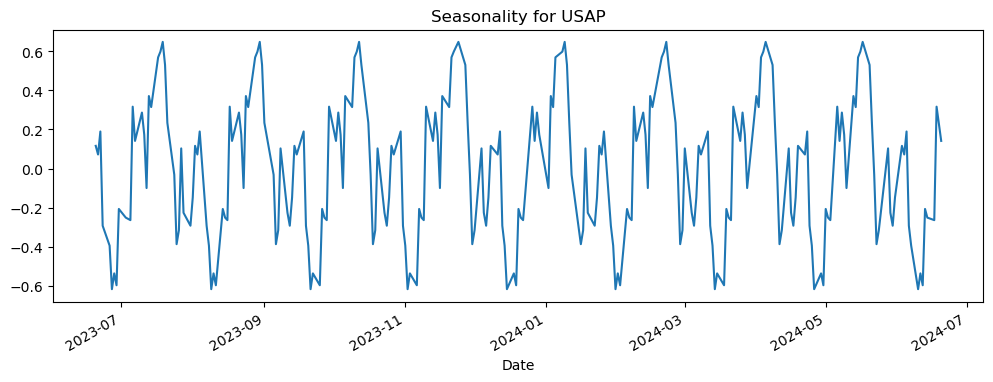

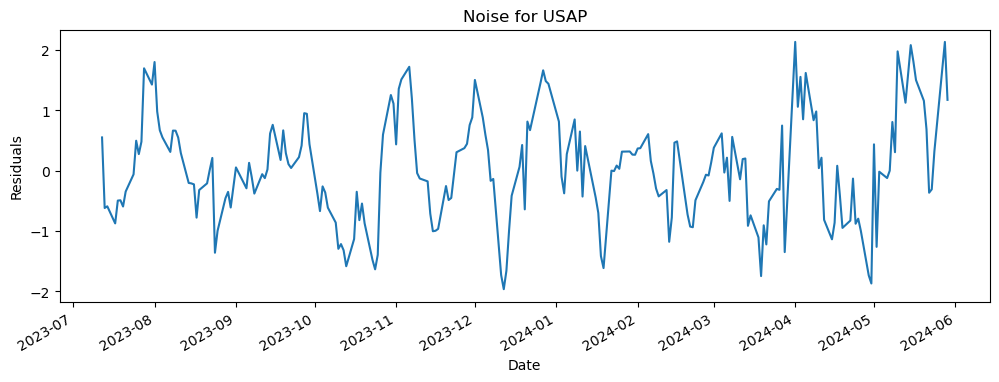

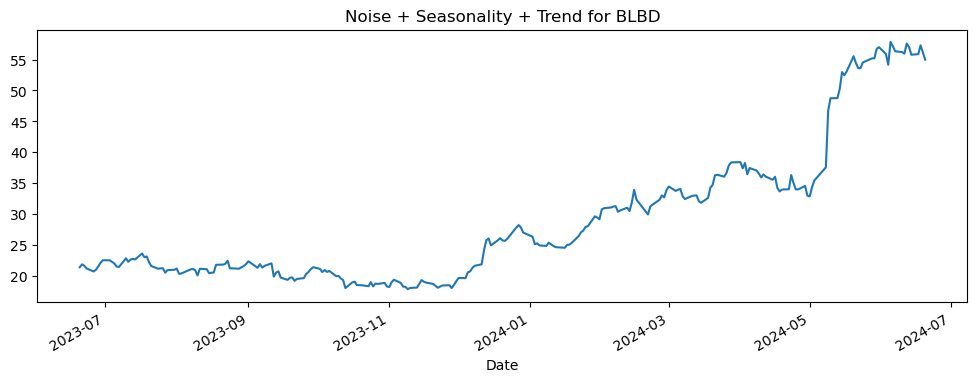

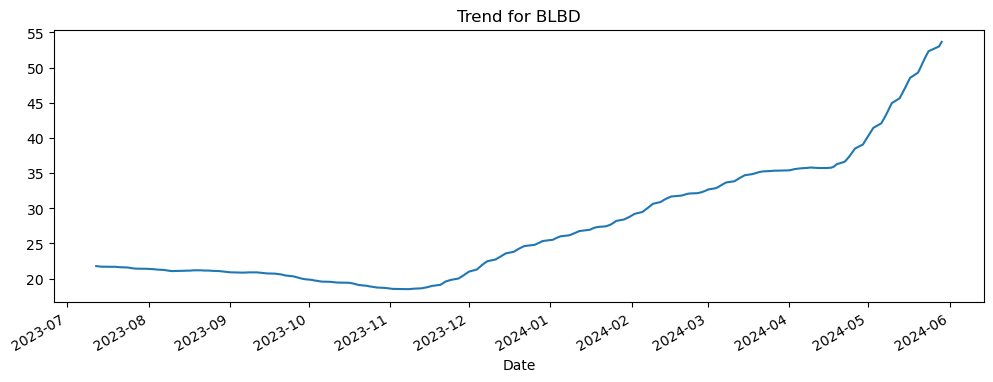

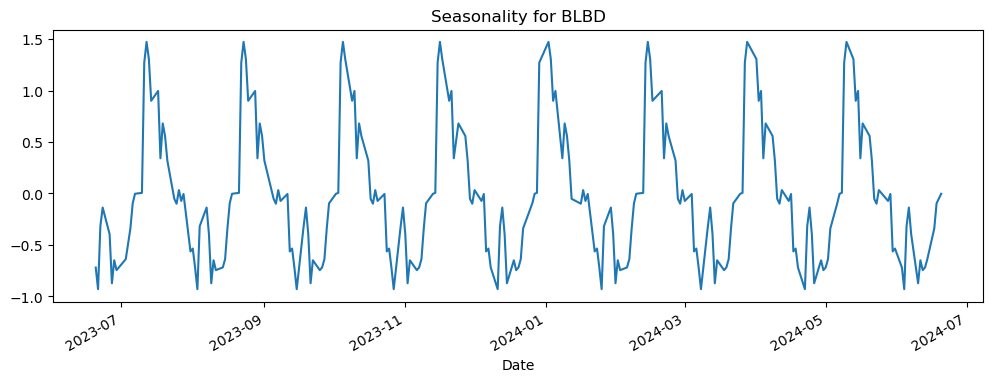

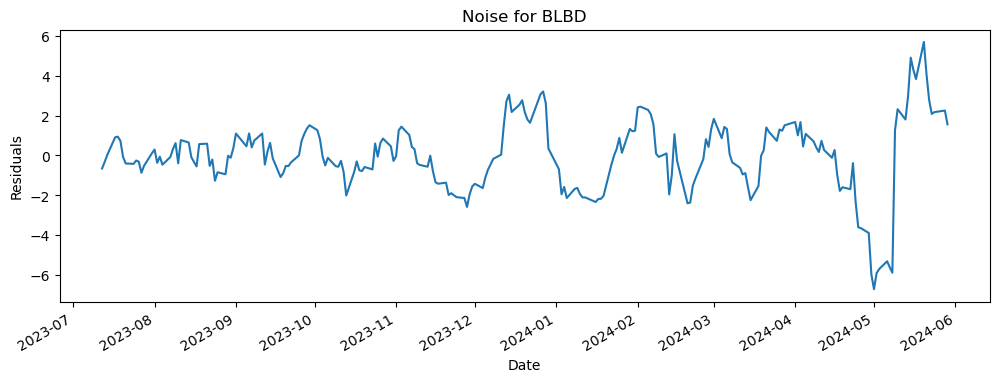

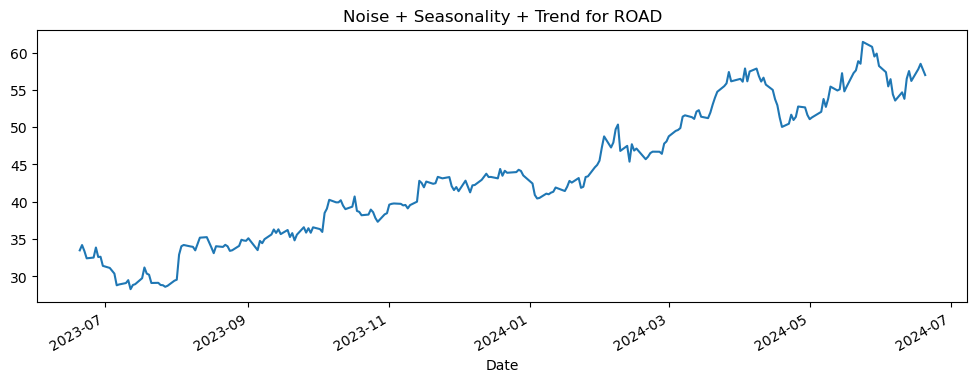

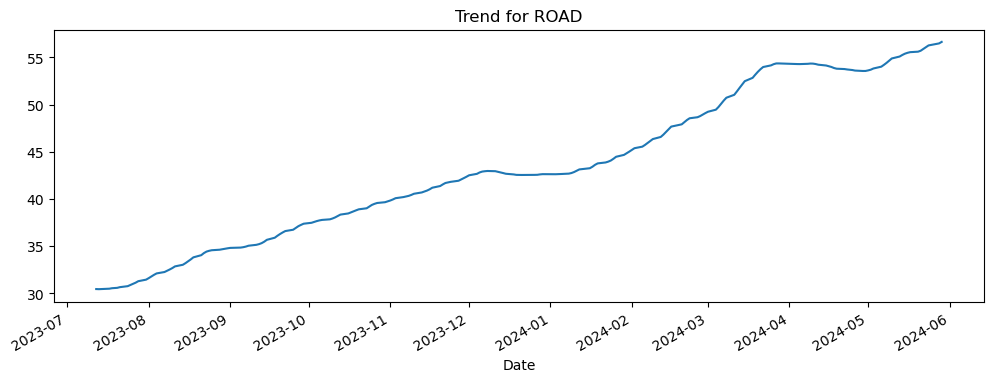

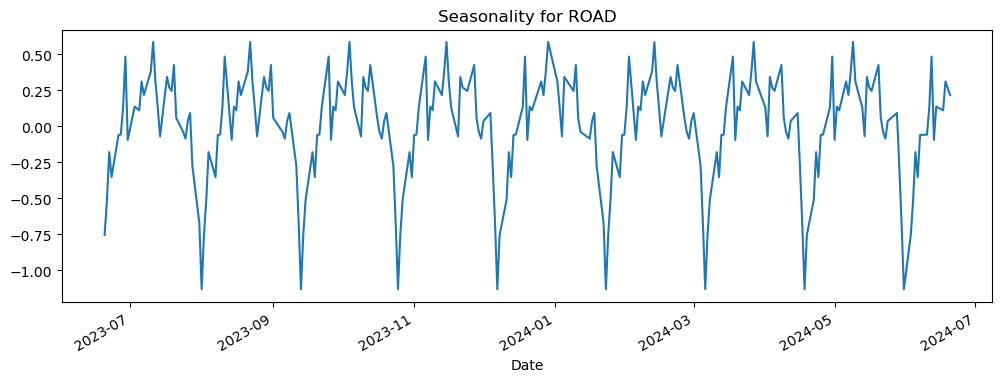

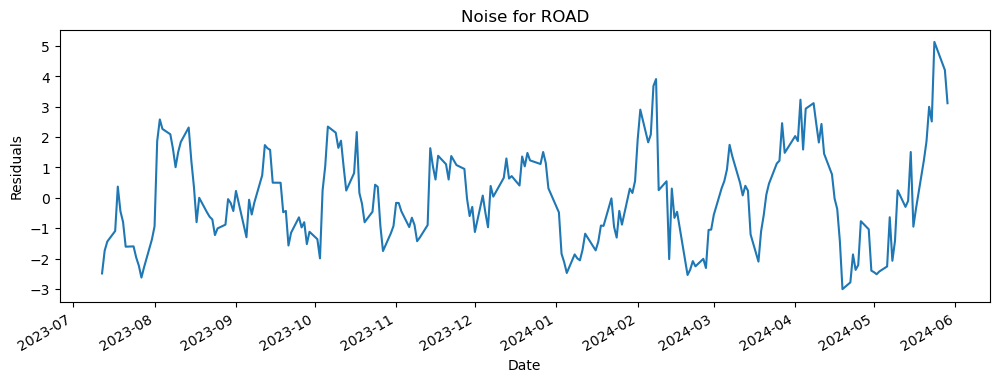

In [69]:
def analyze_noise_seasonality_trend(company):
    data = globals().get(company)
    result = seasonal_decompose(data['adj close'], model='additive', period=30) 
    
    plt.figure(figsize=(12, 4))
    result.observed.plot(title=f'Noise + Seasonality + Trend for {company}')
    plt.xlabel('Date')
    plt.show()
    
    plt.figure(figsize=(12, 4))
    result.trend.plot(title=f'Trend for {company}')
    plt.xlabel('Date')
    plt.show()
    
    plt.figure(figsize=(12, 4))
    result.seasonal.plot(title=f'Seasonality for {company}')
    plt.xlabel('Date')
    plt.show()
    
    plt.figure(figsize=(12, 4))
    result.resid.plot(title=f'Noise for {company}')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.show()

for company in company_list:
    analyze_noise_seasonality_trend(company)

7. time series - autocorrelation

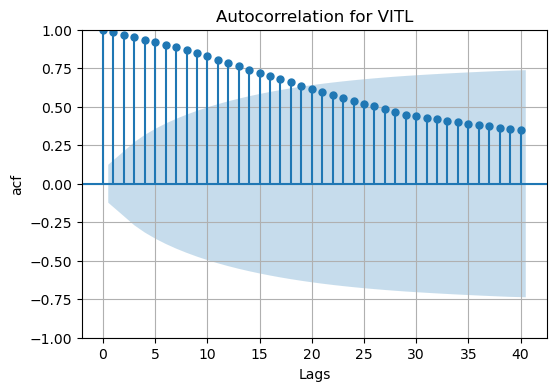

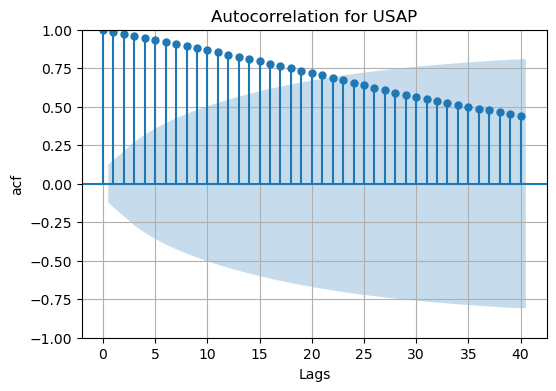

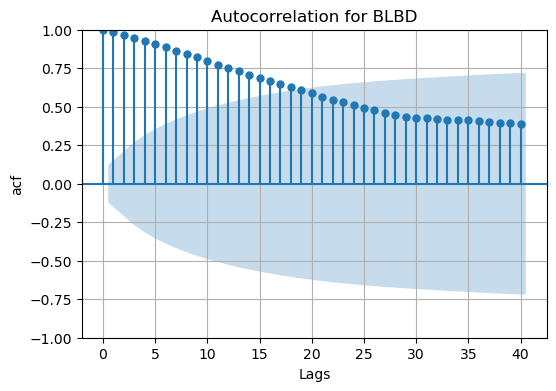

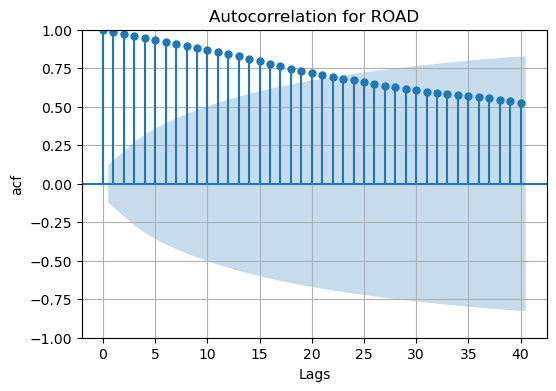

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
def analyze_autocorrelation(company):
    data = globals().get(company)
    
    plt.figure(figsize=(6,4))
    plot_acf(data['Close'], ax=plt.gca(), lags=40)
    plt.title(f'Autocorrelation for {company}')
    plt.xlabel('Lags')
    plt.ylabel('acf')
    plt.grid(True)
    plt.show()

for company in company_list:
    analyze_autocorrelation(company)

我们设定了滞后最大天数为40天，由此我们可以发现，这四个股票做出的ACF图都具有逐渐衰减的自相关系数，那么说明这四只股票均具有长期的可能性趋势，且我们发现对于四个股票而言，当滞后天数小于10天时，自相关系数都比较大且趋近于1且超出置信区间阈值，说明四个股价在10天内任意时间都具有强烈的周期性，通过观察ACF图，我们可以确认股票价格确实存在每10天左右的的周期性变化。这种对于交易者而言则就会基于这种周期性来计划买入或卖出的时机，因此可以基于历史价格进行盈利交易。

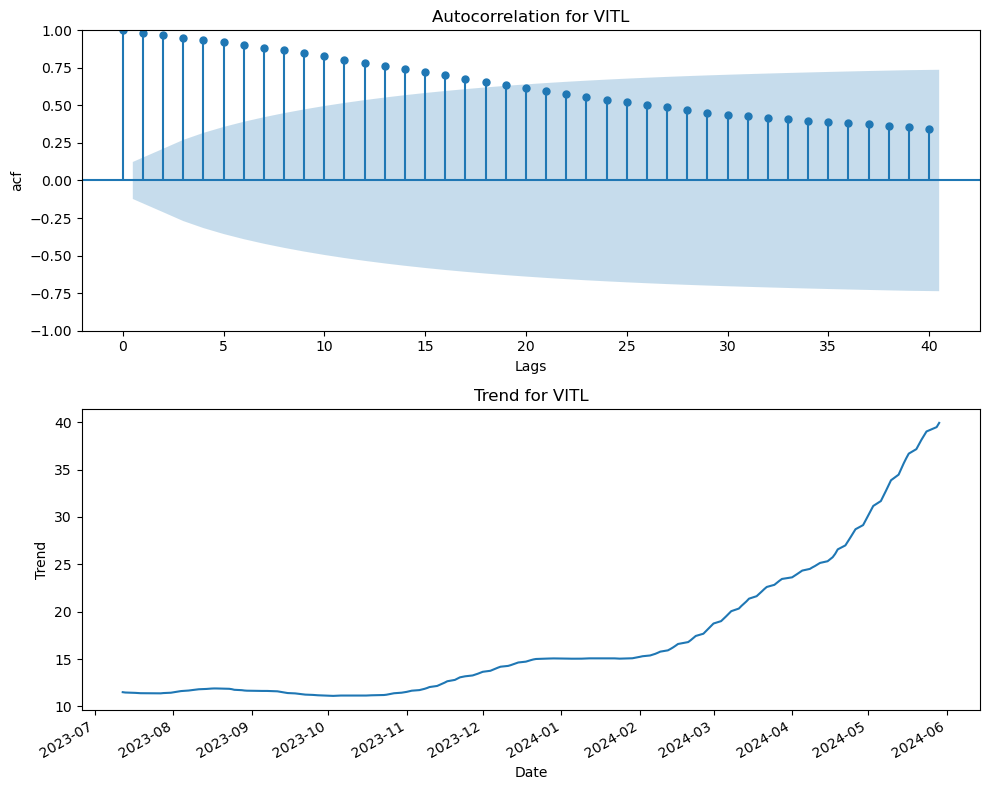

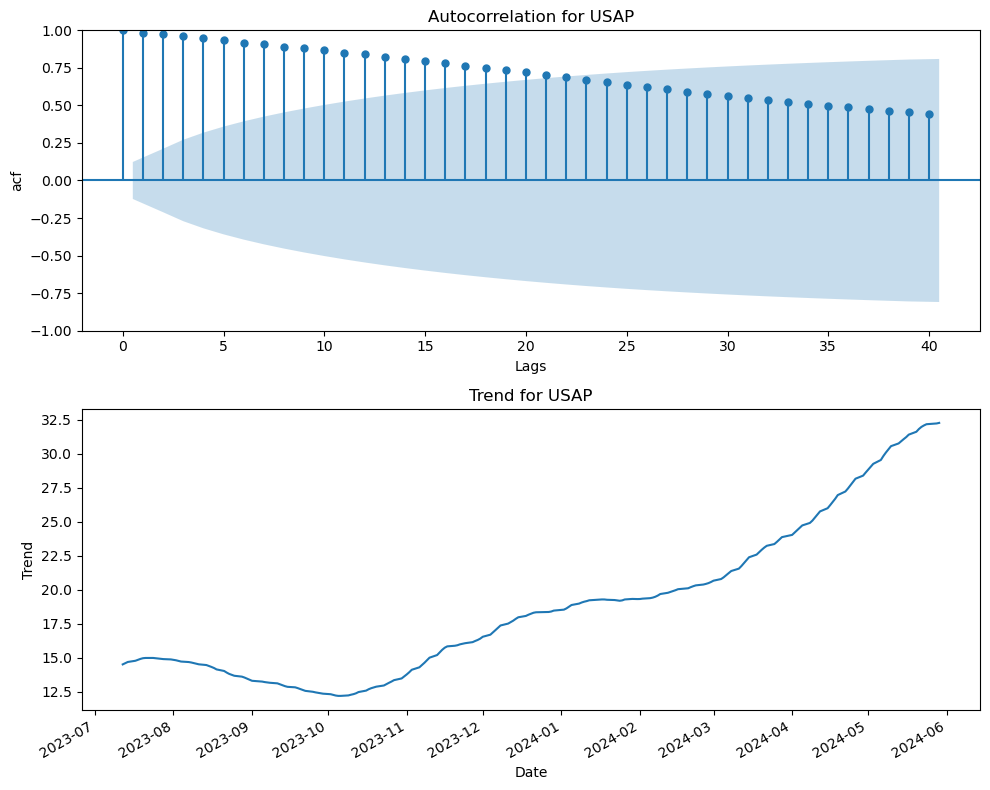

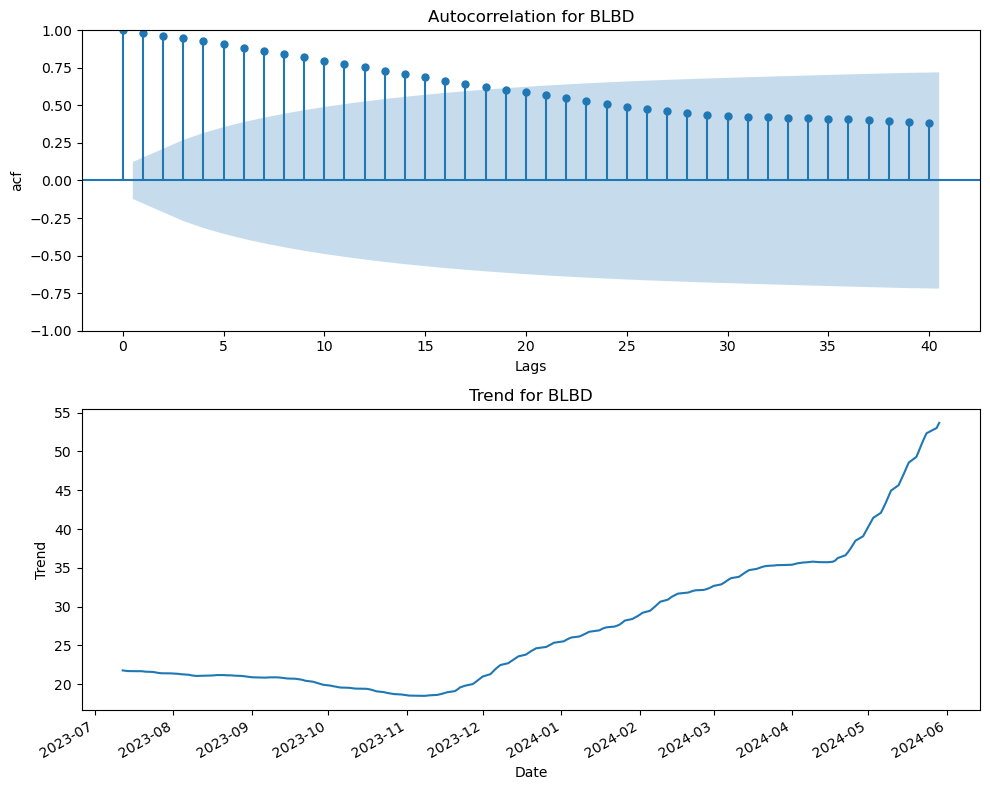

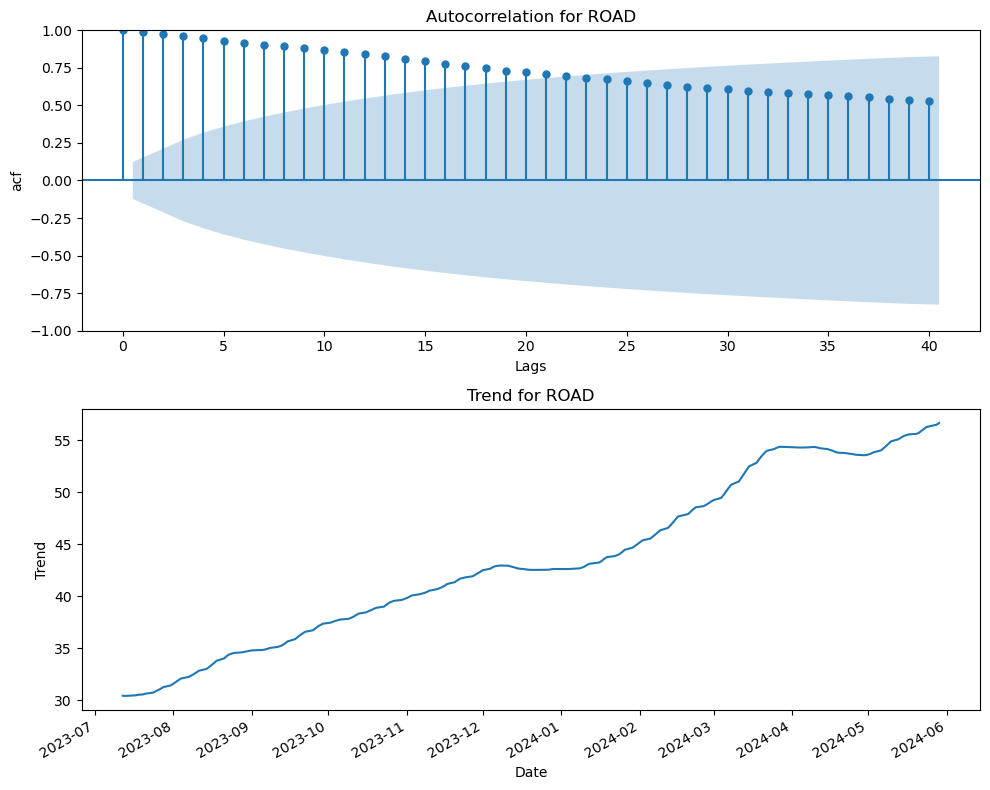

In [34]:
def autocorrelation_and_trend(company):
    data = globals().get(company)
    result = seasonal_decompose(data['adj close'], model='additive', period=30) 
    
    plt.figure(figsize=(10,8))
    plt.subplot(2, 1, 1)
    plot_acf(data['adj close'], ax=plt.gca(), lags=40)
    plt.title(f'Autocorrelation for {company}')
    plt.xlabel('Lags')
    plt.ylabel('acf')

    plt.subplot(2, 1, 2)
    result.trend.plot(title=f'Trend for {company}')
    plt.xlabel('Date')
    plt.ylabel('Trend')
    
    plt.tight_layout()
    plt.show()

for company in company_list:
    autocorrelation_and_trend(company) 

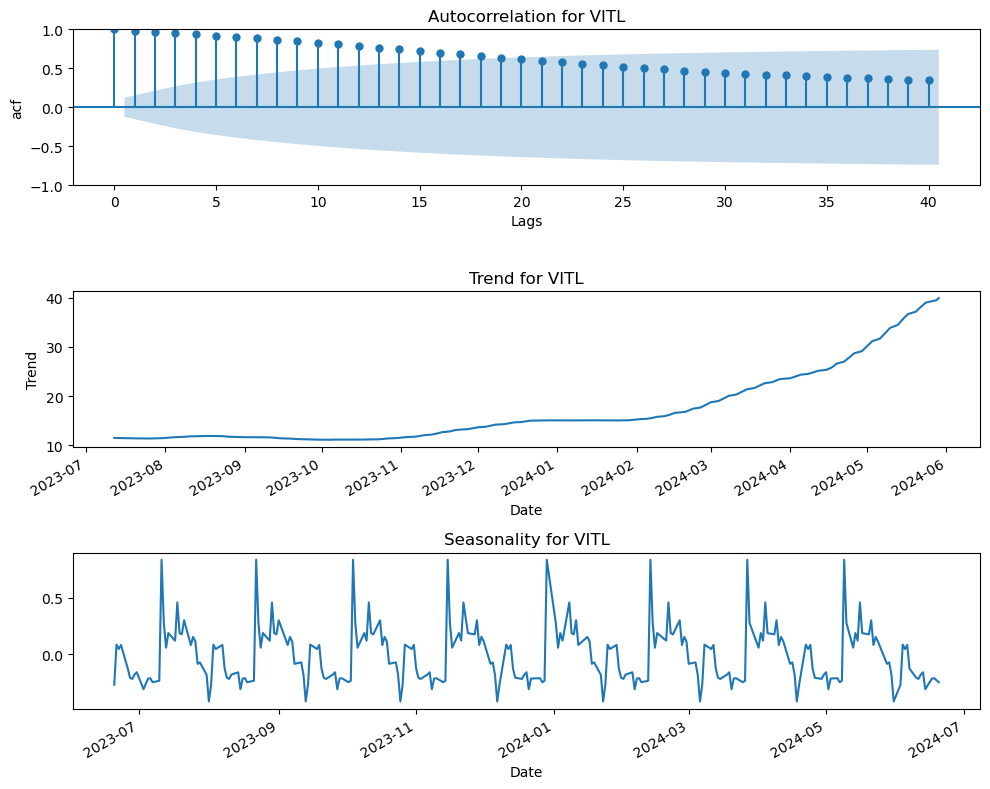

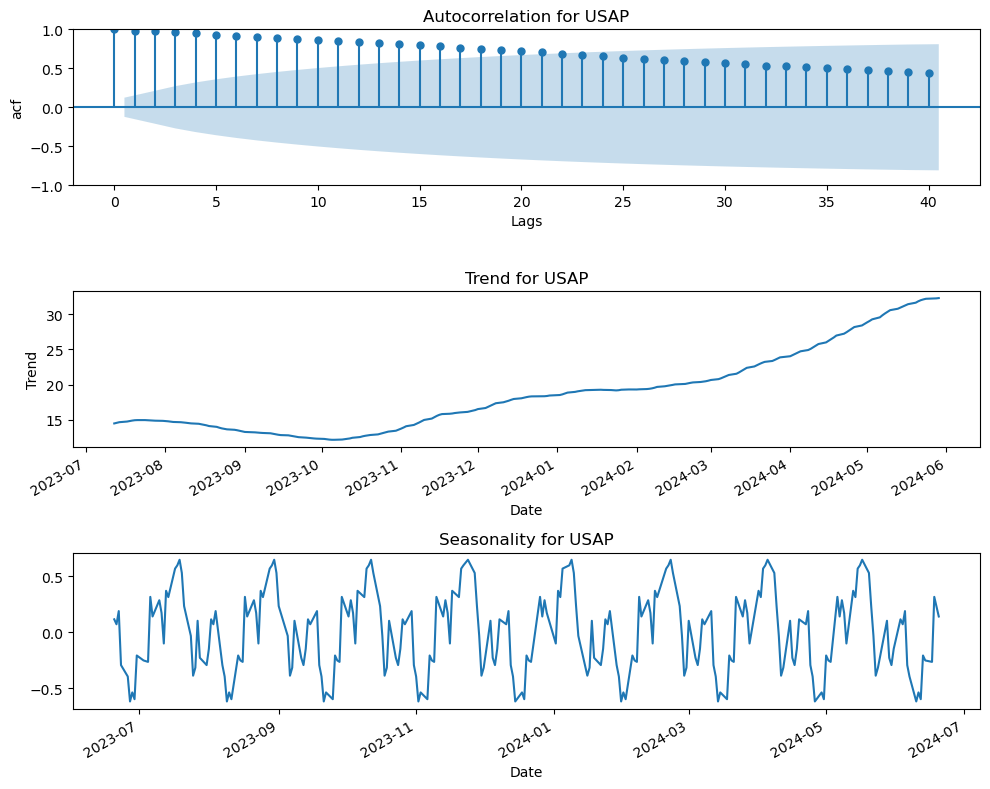

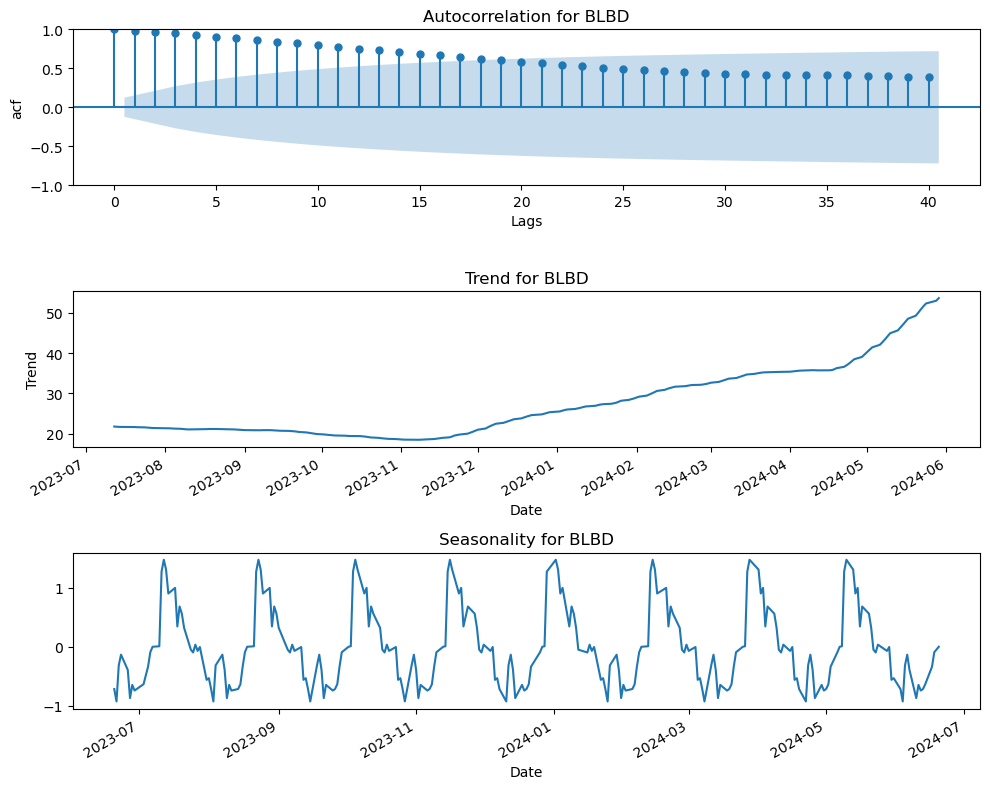

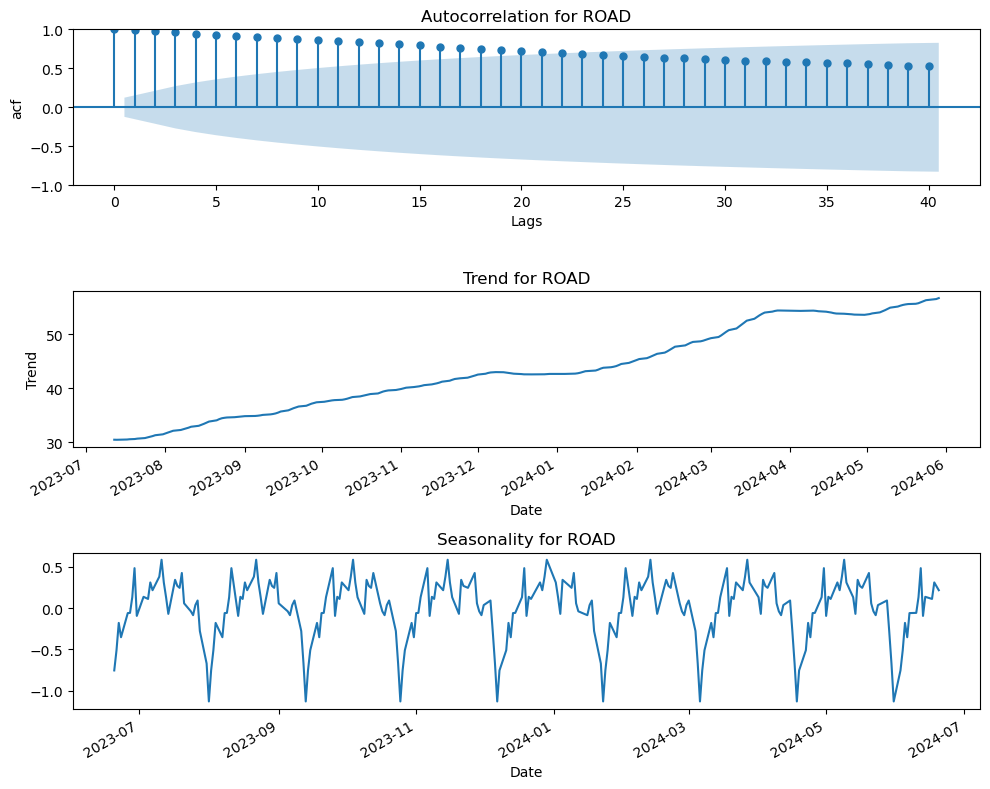

In [33]:
def autocorrelation_seasonality_trend(company):
    data = globals().get(company)
 
    result = seasonal_decompose(data['adj close'], model='additive', period=30)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,8))

    plot_acf(data['adj close'], ax=ax1, lags=40)
    ax1.set_title(f'Autocorrelation for {company}')
    ax1.set_xlabel('Lags')
    ax1.set_ylabel('acf')

    result.trend.plot(ax=ax2, title=f'Trend for {company}')
    ax2.set_ylabel('Trend')
    ax2.set_xlabel('Date')

    result.seasonal.plot(ax=ax3, title=f'Seasonality for {company}')
    ax3.set_xlabel('Date')
    
    plt.tight_layout()
    plt.show()

for company in company_list:
    autocorrelation_seasonality_trend(company)

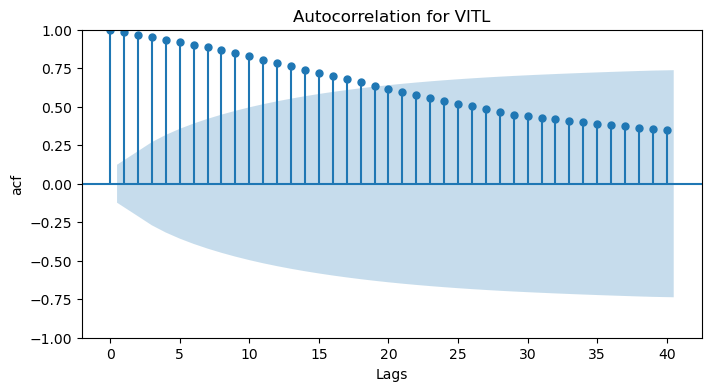

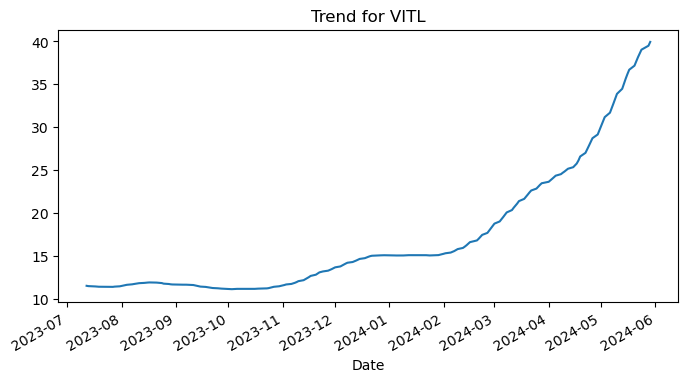

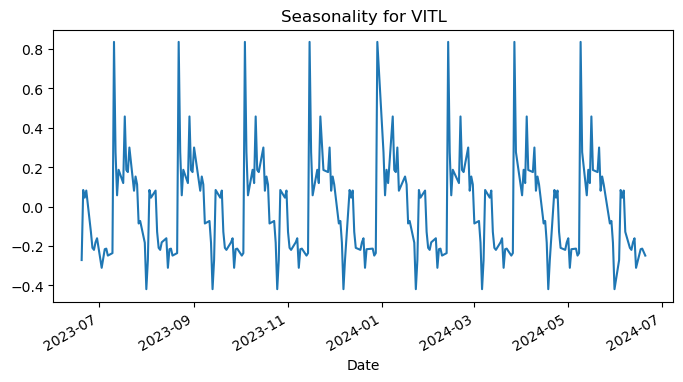

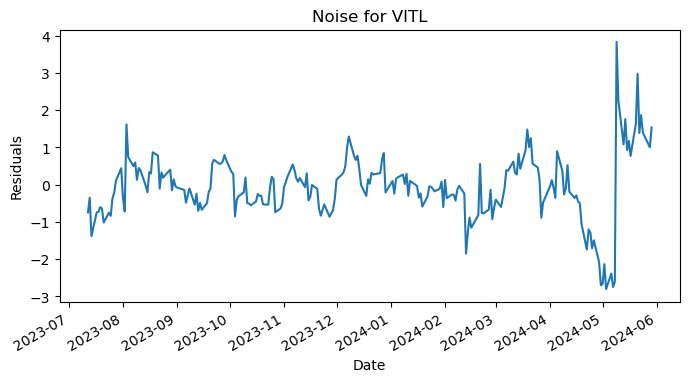

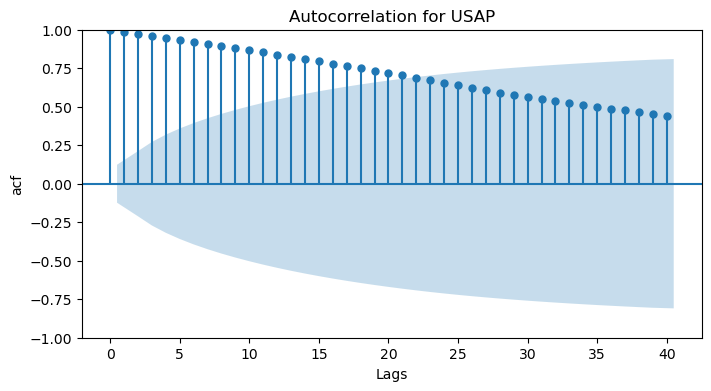

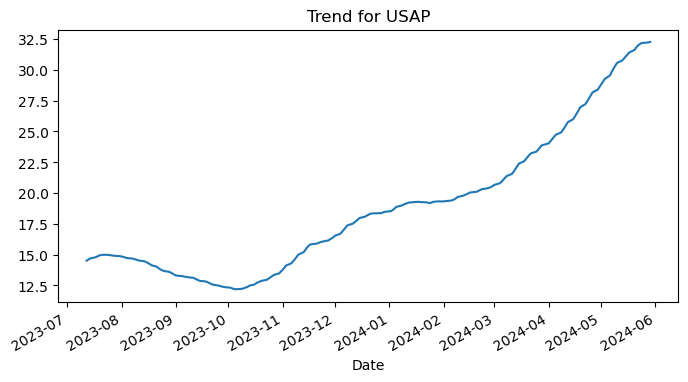

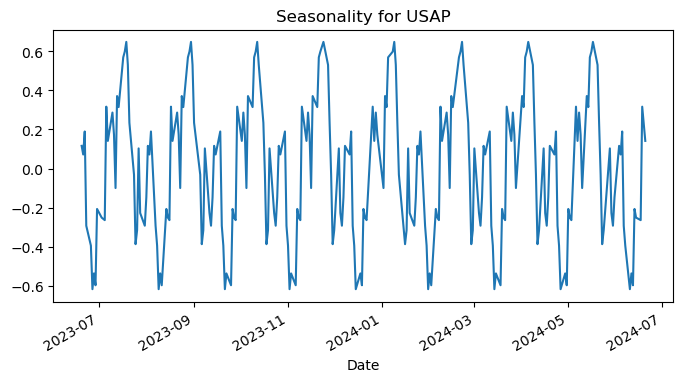

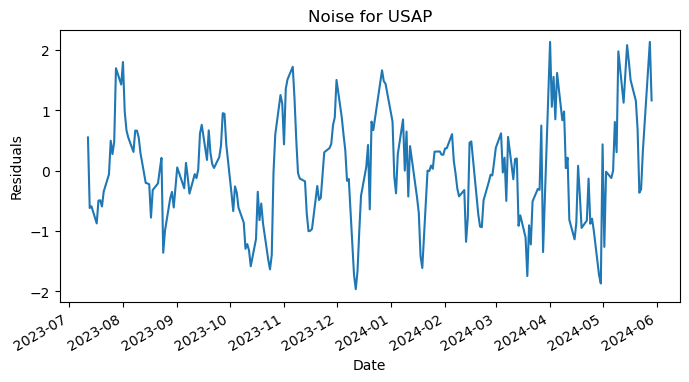

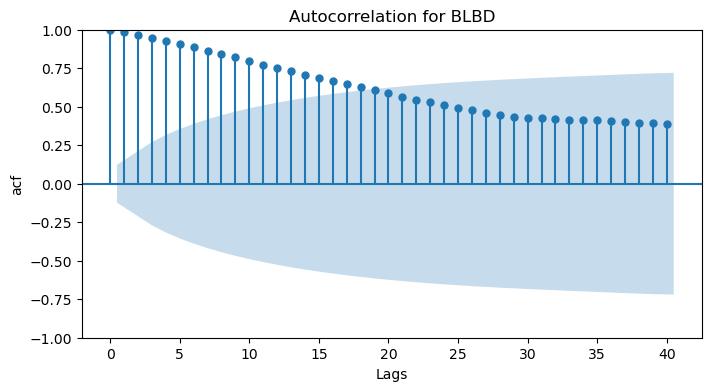

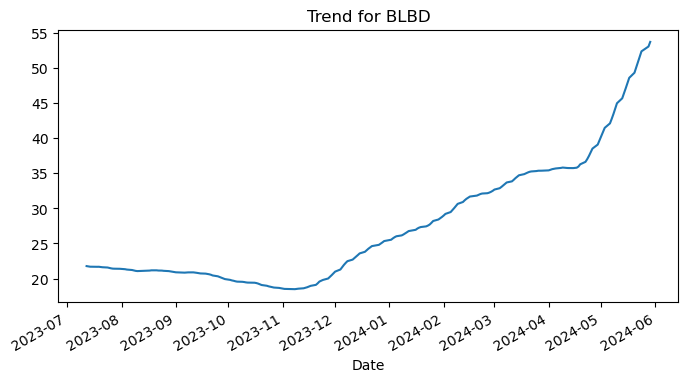

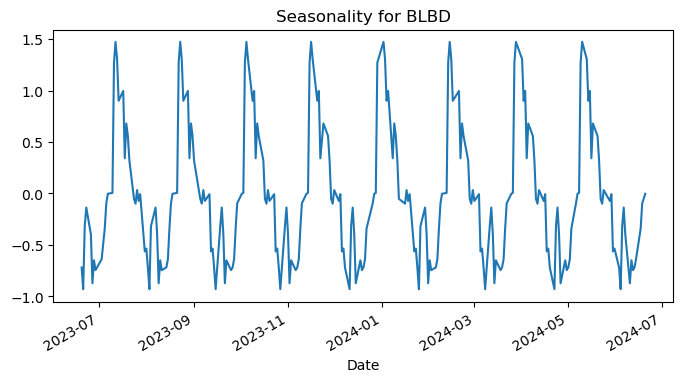

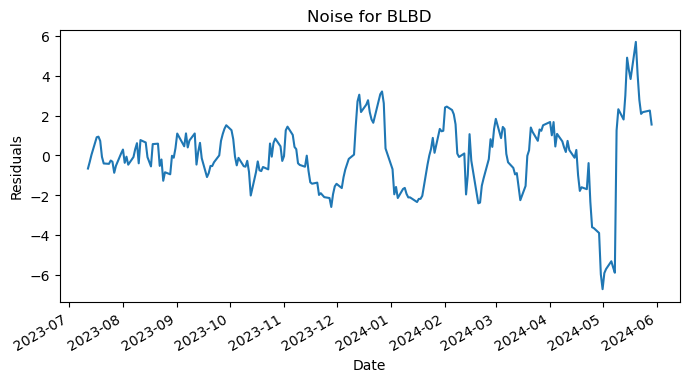

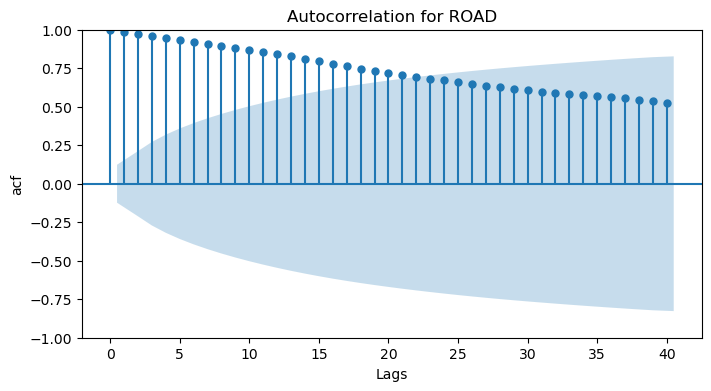

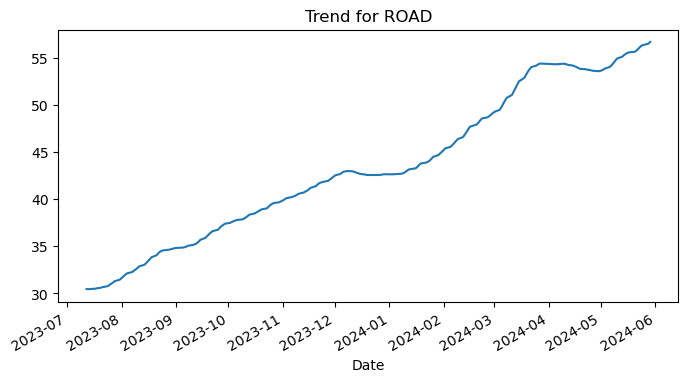

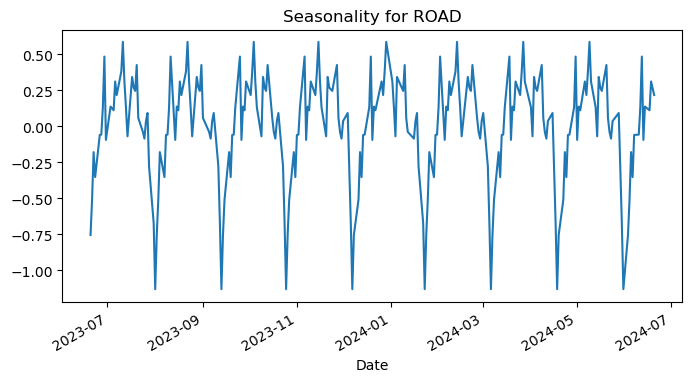

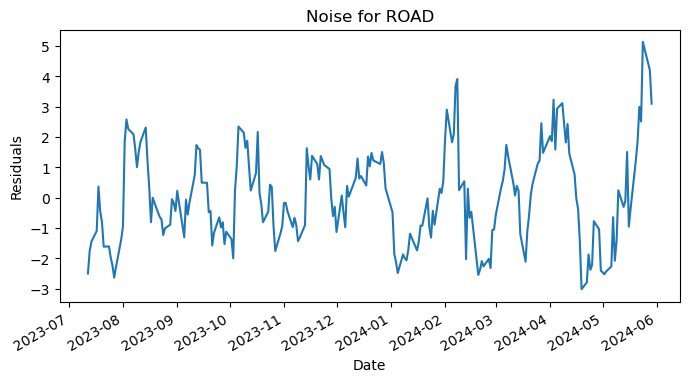

In [32]:
def autocorrelation_seasonality_noise_trend(company):
    data = globals().get(company)
    
    result = seasonal_decompose(data['adj close'], model='additive', period=30) 
    
    plt.figure(figsize=(8, 4))
    plot_acf(data['adj close'], ax=plt.gca(), lags=40)
    plt.title(f'Autocorrelation for {company}')
    plt.xlabel('Lags')
    plt.ylabel('acf')
    plt.show()
 
    plt.figure(figsize=(8,4))
    result.trend.plot(title=f'Trend for {company}')
    plt.xlabel('Date')
    plt.show()
    
    plt.figure(figsize=(8, 4))
    result.seasonal.plot(title=f'Seasonality for {company}')
    plt.xlabel('Date')
    plt.show()
    
    plt.figure(figsize=(8, 4))
    result.resid.plot(title=f'Noise for {company}')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.show()

for company in company_list:
    autocorrelation_seasonality_noise_trend(company)

In [71]:
!pip install ruptures
import ruptures as rpt
def plot_autocorrelation_seasonality_noise_trend_breakpoints(company):
    data = globals().get(company)

    result = seasonal_decompose(data['adj close'], model='additive', period=30) 
    
    plt.figure(figsize=(12, 4))
    plot_acf(data['adj close'], ax=plt.gca(), lags=40)
    plt.title(f'Autocorrelation for {company}')
    plt.xlabel('Lags')
    plt.ylabel('acf')
    plt.show()
    
    plt.figure(figsize=(12, 4))
    result.trend.plot(title=f'Trend for {company}')
    plt.xlabel('Date')
    plt.ylabel('Trend')
    plt.show()
    
    plt.figure(figsize=(12, 4))
    result.seasonal.plot(title=f'Seasonality for {company}')
    plt.xlabel('Date')
    plt.show()
    
    plt.figure(figsize=(12, 4))
    result.resid.plot(title=f'Noise for {company}')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.show()
   
    signal = data['adj close'].values
    algo = rpt.Pelt(model="rbf").fit(signal)
    result = algo.predict(pen=10)
  
    rpt.display(signal, result, figsize=(12, 6))
    plt.title(f'Break Points for {company}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()

for company in company_list:
    plot_autocorrelation_seasonality_noise_trend_breakpoints(company)

Looking in indexes: http://mirrors.tencentyun.com/pypi/simple/


ERROR: Could not find a version that satisfies the requirement ruptures (from versions: none)
ERROR: No matching distribution found for ruptures


ModuleNotFoundError: No module named 'ruptures'

9. Moving average

In [77]:
MA_days = [10, 20, 30]

for ma in MA_days:
    ma_str = "MA: {}".format(ma)
    VITL[ma_str] = VITL['adj close'].rolling(ma).mean()
    USAP[ma_str] = USAP['adj close'].rolling(ma).mean()
    BLBD[ma_str] = BLBD['adj close'].rolling(ma).mean()
    ROAD[ma_str] = ROAD['adj close'].rolling(ma).mean()


In [76]:
def plot_graphic(company, company_string):
    plt.figure(figsize=(15, 6))
    plt.plot(company['adj close'])
    plt.plot(company['MA: 10'])
    plt.plot(company['MA: 20'])
    plt.plot(company['MA: 30'])

    plt.title(company_string)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(('adj close','MA: 10', 'MA: 20', 'MA:30'))
    plt.grid()
    plt.show()

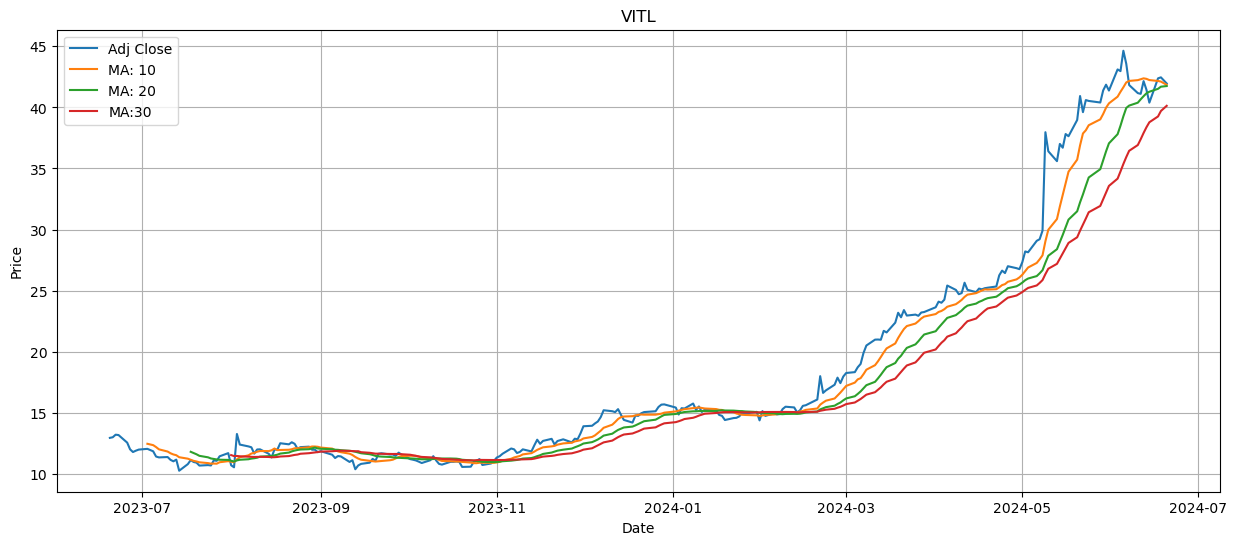

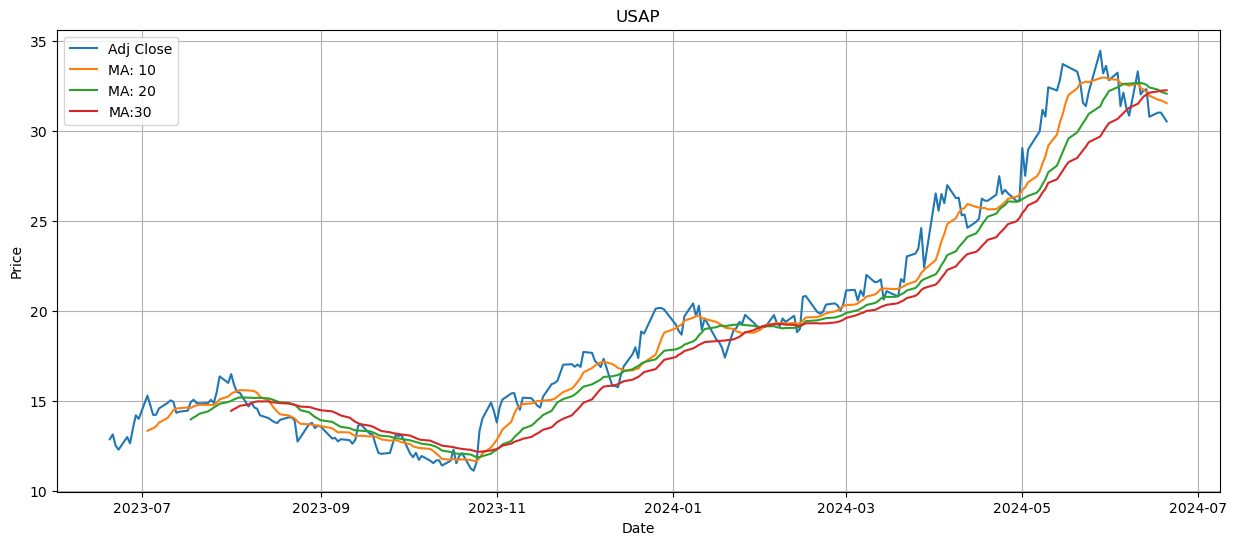

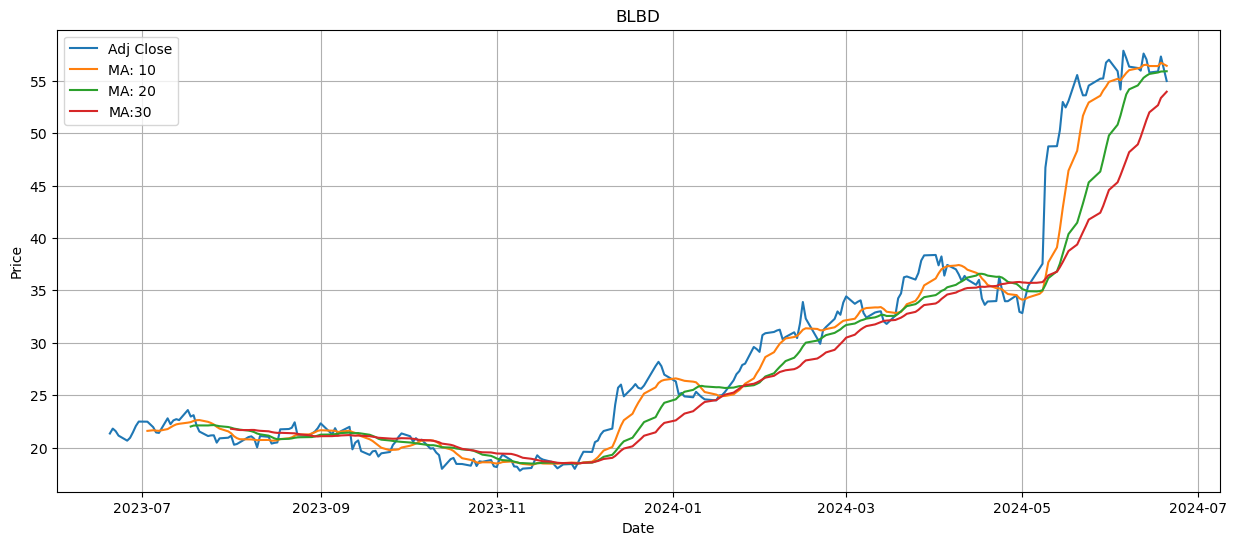

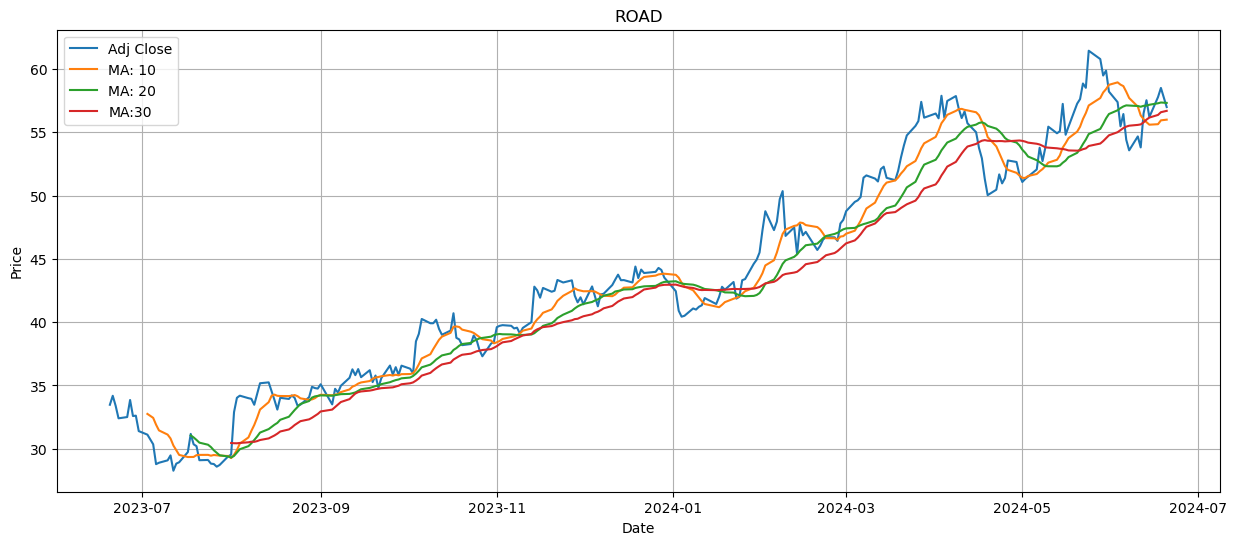

In [78]:
data_list = [VITL,USAP,BLBD,ROAD]

for i in range(len(data_list)):
    plot_graphic(data_list[i], company_list[i])

当短期移动平均线从下向上穿过长期移动平均线时，称为“金叉”，通常被视为买入信号。
相反，当短期移动平均线从上向下穿过长期移动平均线时，称为“死叉”，通常被视为卖出信号。

Asset Allocation

part1---introduction

Data science is a multidisciplinary field that uses statistical methods, algorithms, and technology to extract knowledge and insights from structured and unstructured data. The primary goal of data science is to analyze and interpret complex data to aid in decision-making and problem-solving. In financial markets, data science can be applied to predict stock prices, assess risks, detect fraud, and optimize investment strategies, helping traders and investors make more informed decisions.

part2---libraries

`yfinance` is a Python library designed to simplify the process of accessing financial data from Yahoo Finance. It allows users to download historical market data, real-time price information, and various financial metrics for stocks, indices, and other financial instruments. `yfinance` is highly popular due to its ease of use and comprehensive coverage, making it a go-to choice for analysts, traders, and researchers who need to work with financial data for analysis, backtesting, and research purposes. Its ability to provide a wide range of data in a convenient and efficient manner has made it an essential tool in the field of financial analysis.

In [1]:
# Installing yfinance
!pip install yfinance

Looking in indexes: http://mirrors.tencentyun.com/pypi/simple/


`QuantStats` is a Python library that focuses on advanced quantitative analysis and performance metrics for trading strategies. It provides a comprehensive set of tools to evaluate and visualize the performance of investment portfolios, including metrics for returns, risk, and drawdowns. `QuantStats` stands out for its ability to generate detailed, visually appealing reports that help users understand the strengths and weaknesses of their trading strategies. By integrating seamlessly with other financial libraries and data sources, `QuantStats` is an invaluable resource for traders, analysts, and researchers aiming to conduct in-depth performance analysis and improve their investment decision-making.

In [12]:
# Installing Quantstats
!pip install quantstats --index-url=https://pypi.org/simple

   ---------------------------------------- 0.0/45.5 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/45.5 kB 320.0 kB/s eta 0:00:01
   ---------------------------------------- 45.5/45.5 kB 452.5 kB/s eta 0:00:00


`PyPortfolioOpt` is a Python library designed for portfolio optimization and management. It provides a range of tools to help users construct and analyze investment portfolios, using techniques like mean-variance optimization, the Black-Litterman model, and hierarchical risk parity. `PyPortfolioOpt` aims to make sophisticated portfolio optimization methods accessible and easy to use, allowing users to achieve efficient portfolios that maximize returns for a given level of risk. The library is widely used by financial analysts, researchers, and traders to enhance their portfolio management strategies through robust optimization techniques.

In [14]:
# installing PyPortfolioOpt
!pip install pyportfolioopt --index-url=https://pypi.org/simple

   ---------------------------------------- 0.0/61.9 kB ? eta -:--:--
   ---------------------------------------- 61.9/61.9 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------- -------------------------------- 0.2/1.1 MB 13.0 MB/s eta 0:00:01
   ---------------------------------------  1.0/1.1 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 13.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/736.4 kB ? eta -:--:--
   --------------------------------------- 736.4/736.4 kB 45.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/72.2 kB ? eta -:--:--
   ---------------------------------------- 72.2/72.2 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/293.0 kB ? eta -:--:--
   --------------------------------------- 293.0/293.0 kB 17.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---- -------------------------

The `Technical Analysis` library in Python, often referred to as `TA`, is a comprehensive toolkit designed for applying technical analysis indicators to financial market data. It includes a wide range of indicators such as moving averages, relative strength index (RSI), Bollinger Bands, and MACD, among others. The library aims to simplify the process of integrating these indicators into trading strategies and analysis workflows. By providing easy-to-use functions for calculating and visualizing technical indicators, the `Technical Analysis` library helps traders and analysts gain insights into market trends, momentum, and potential buy or sell signals, thus enhancing their decision-making processes.

In [15]:
# Installing the TA (Technical Analysis) library
!pip install ta --index-url=https://pypi.org/simple

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29422 sha256=184f85b9aee7963410eef77ffd2a1d6ba88cddc446a0ea8c01da1962d4dcc288
  Stored in directory: c:\users\andy\appdata\local\pip\cache\wheels\a1\d7\29\7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


Import all the libraries 导入所有的包

In [58]:
# Importing Libraries

# Data handling and statistical analysis
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data
import quantstats as qs
import ta
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

part3---start with basic tools of analysis

Daily returns
a fundamental concept in financial economics, represent the percentage change in the price of a security or market index from one day to the next. This metric is crucial for understanding the day-to-day fluctuations and overall performance of an investment. In business analysis, daily returns are used to assess the volatility, risk, and potential return of investments.

In [59]:
#use Quantstats utils.download_returns method to download the daily returns 使用Quantstat数据包直接获得所有股票的对应最近六个月收益并直接做图！
# Getting daily returns for 4 different US stocks in the same time window
vitl = qs.utils.download_returns('VITL')
vitl = vitl.loc['2021-01-01':'2024-06-24']

usap = qs.utils.download_returns('USAP')
usap = usap.loc['2021-01-01':'2024-06-24']

blbd = qs.utils.download_returns('BLBD')
blbd = blbd.loc['2021-01-01':'2024-06-24']

road = qs.utils.download_returns('ROAD')
road = road.loc['2021-01-01':'2024-06-24']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [60]:
# Converting timezone 将四只股票的每日回报率数据的时间索引转换为无时区（即移除时区信息）。这是为了确保所有时间索引在同一时区
if vitl.index.tz is None:
    vitl.index = vitl.index.tz_localize('UTC')
vitl.index = vitl.index.tz_convert(None)

if usap.index.tz is None:
    usap.index = usap.index.tz_localize('UTC')
usap.index = usap.index.tz_convert(None)

if blbd.index.tz is None:
    blbd.index = blbd.index.tz_localize('UTC')
blbd.index = blbd.index.tz_convert(None)

if road.index.tz is None:
    road.index = road.index.tz_localize('UTC')
road.index = road.index.tz_convert(None)




Vital Farms Inc. Daily Returns Plot:



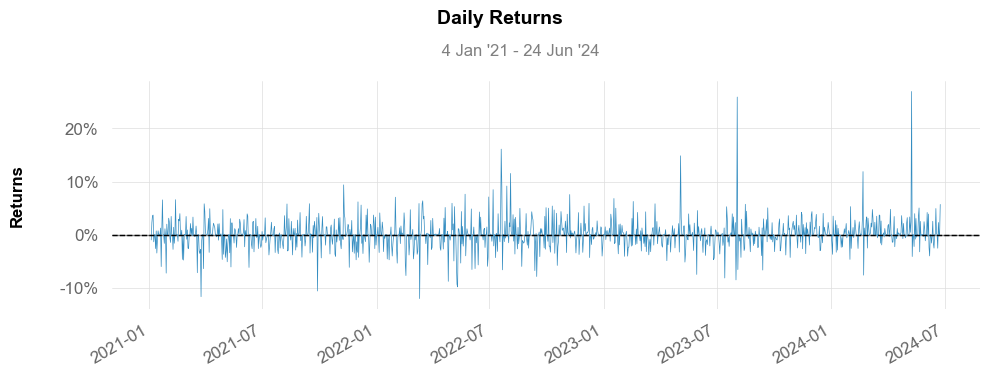






Universal Stainless&Alloy Products Inc. Daily Returns Plot:



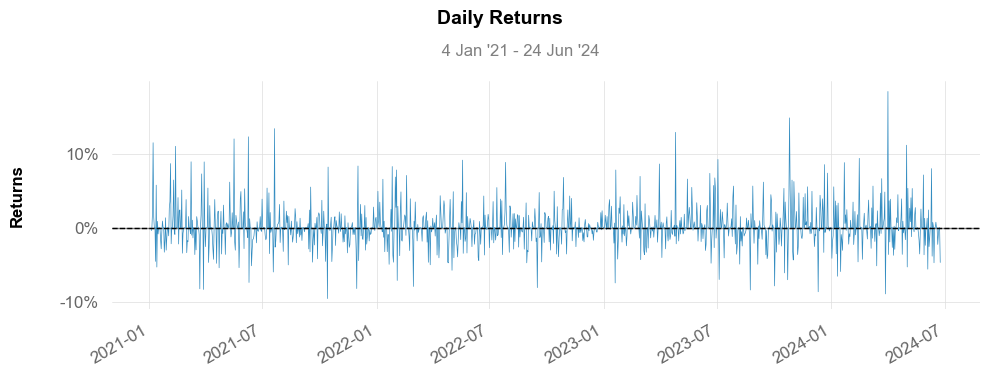






Blue Birds Corporation Daily Returns Plot:



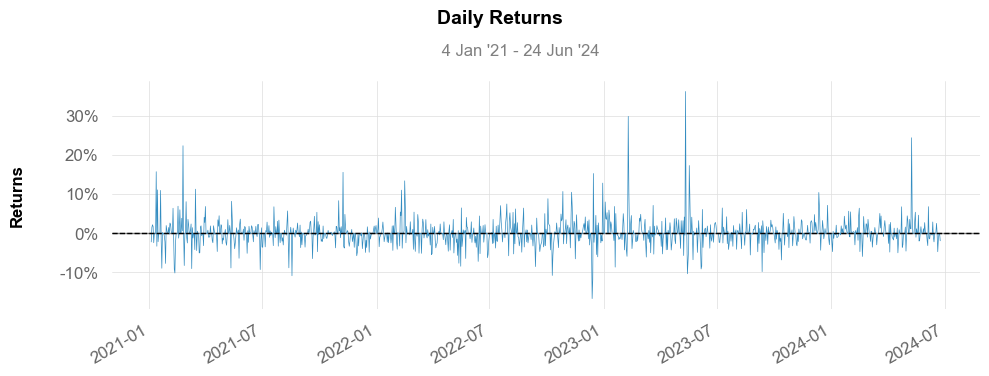






Constructions Partners Inc. Daily Returns Plot:



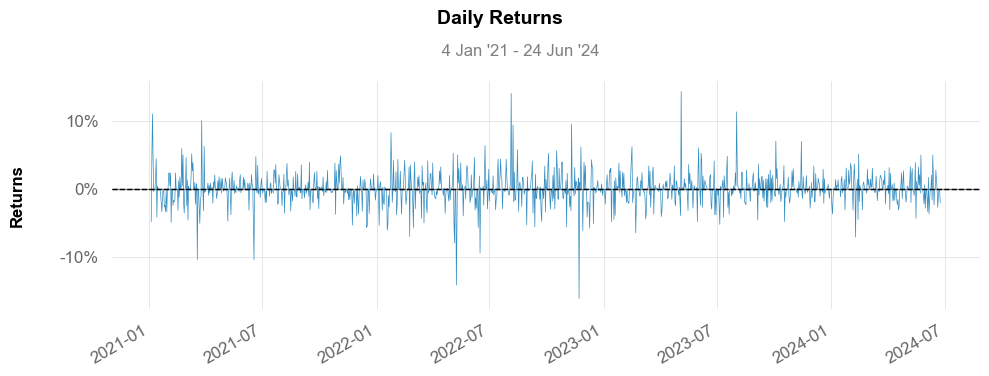

In [61]:
# Plotting Daily Returns for each stock
print('\n')
print('\nVital Farms Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(vitl,benchmark=None)
print('\n')
print('\n')
print('\nUniversal Stainless&Alloy Products Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(usap,benchmark=None)
print('\n')
print('\n')
print('\nBlue Birds Corporation Daily Returns Plot:\n')
qs.plots.daily_returns(blbd,benchmark=None)
print('\n')
print('\n')
print('\nConstructions Partners Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(road,benchmark=None)

我们由此可以看出，VITL和BLBD这两只股票不太稳定，股价分别超出了20%甚至30%的增幅，导致的原因可能是市场消费需求提升等实时利益变化
反之USAP和ROAD这两只股票价格就相对稳定许多

Cumulative returns




Vital Farms Inc. Cumulative Returns Plot



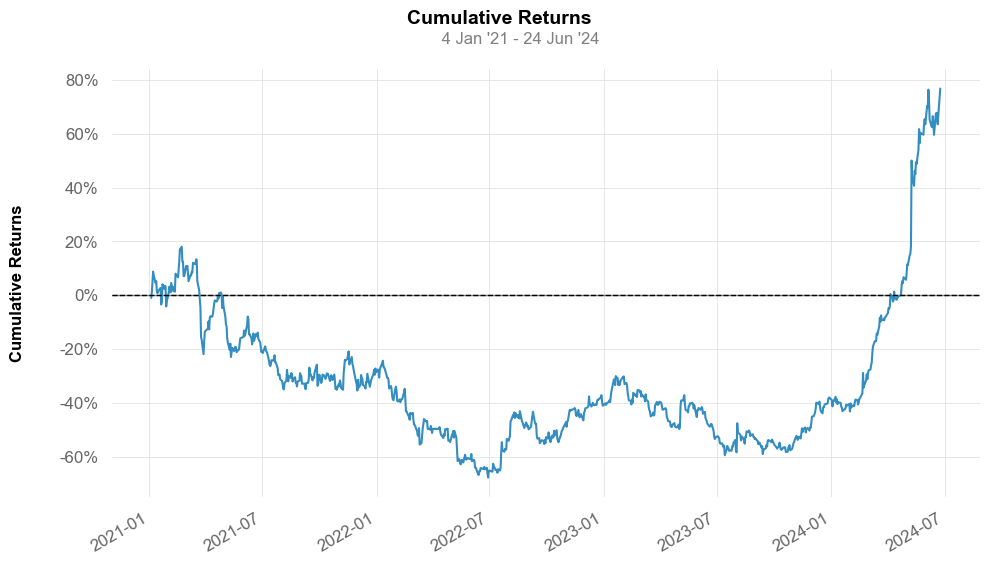






Universal Stainless & Alloy Products Inc. Cumulative Returns Plot



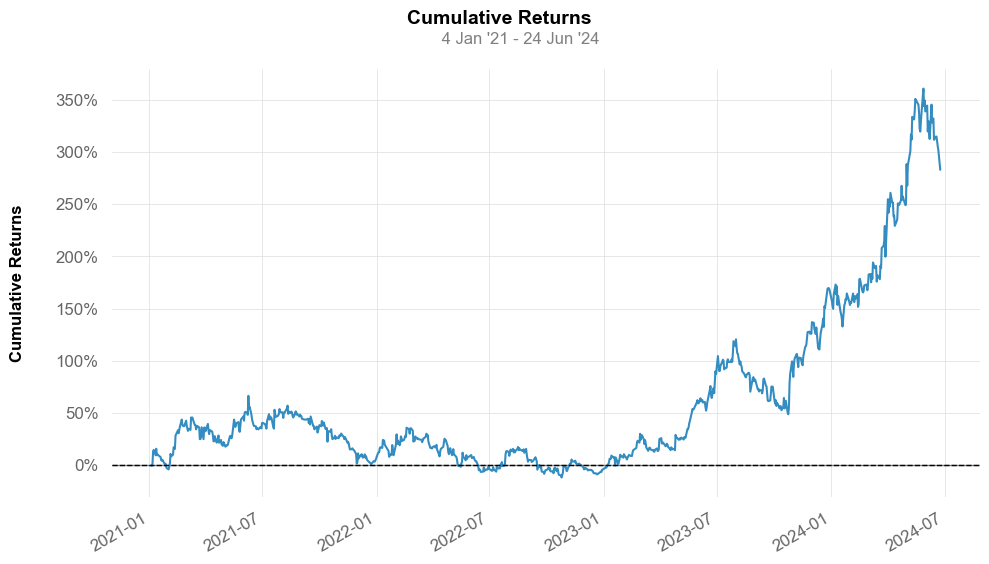






Blue Birds Corporation Cumulative Returns Plot



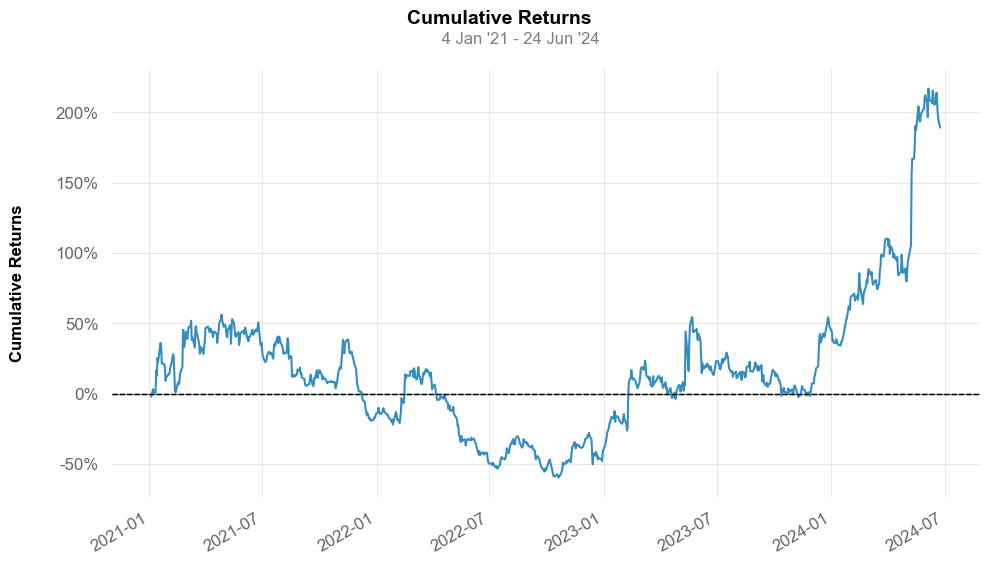






Construction Partners Inc. Cumulative Returns Plot



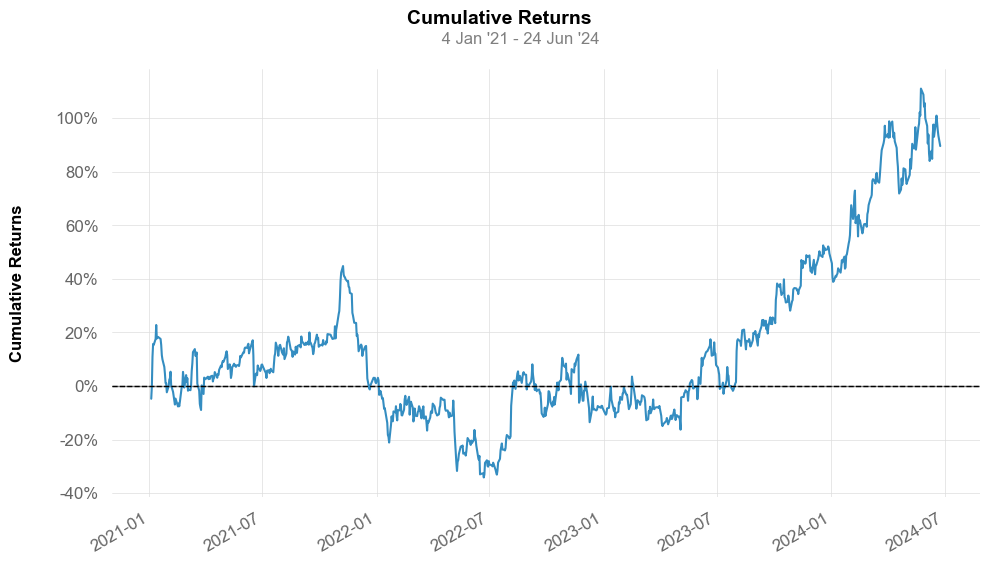

In [62]:
print('\n')
print('\nVital Farms Inc. Cumulative Returns Plot\n')
qs.plots.returns(vitl)
print('\n')
print('\n')
print('\nUniversal Stainless & Alloy Products Inc. Cumulative Returns Plot\n')
qs.plots.returns(usap)
print('\n')
print('\n')
print('\nBlue Birds Corporation Cumulative Returns Plot\n')
qs.plots.returns(blbd)
print('\n')
print('\n')
print('\nConstruction Partners Inc. Cumulative Returns Plot\n')
qs.plots.returns(road)


根据这四个股票在疫情之后的这几年的历史变化，我们可以依次得出相应的可能性结论
Vital Farm公司在今年3月份左右股价出现了巨幅增长，可能在此公司经历了一些事件或者市场环境发生了临时性变化
其余三只股票都在整体上呈现了一种稳步上升的状态，其中USAP公司整体波动性较小，比较稳定值得投资

In [63]:
# Calculate returns and draw distribution 使用PCT_CHANGE函数来对原股票数据直接进行分析得出每个股票对应的日收益分布图

for i in range(len(data_list)):
    data_list[i]['daily returns'] = data_list[i]['adj close'].pct_change()
    sns.displot(data_list[i]['daily returns'].dropna(), bins=50, color='blue', kde=True)
    plt.title(company_list[i])
    plt.show()

NameError: name 'data_list' is not defined

10. daily returns

波动性：分布图的宽度反映了股票价格的波动性。分布越宽，表示股票的价格波动越大。
--我们发现VITL和BLBD分布都较为宽，而ROAD分布最窄意思其价格波动最小
偏度：如果分布不是对称的，则显示了收益分布的偏度。左偏表示频繁的小幅亏损和罕见的大幅盈利；右偏则相反。
--这四只股的日收益图中，我们不难看出VITL股是最右偏性质的，表明偶尔会出现大的盈利，好追求高回报且能承受高风险的投资者可能会偏好右偏的资产
异常值：分布的尾部可以揭示极端收益或亏损的情况，对于风险管理非常重要。
我们也由此可以发现，大部分日收益率趋近于0，
但也有个别极端情况，

Kurtosis

Kurtosis is a statistical measure that describes the shape of a distribution's tails in relation to its overall shape. It provides insights into the presence of outliers and the extremity of data points in the tails of the distribution. There are three main types of kurtosis:

In [64]:
# Using quantstats to measure kurtosis
print('\n')
print("Vital Farm's kurtosis: ", qs.stats.kurtosis(vitl).round(2))
print('\n')
print("Universal Stainless & Alloy Products Inc.'s kurtosis: ", qs.stats.kurtosis(usap).round(2))
print('\n')
print("Blue Birds Corporation's kurtosis ", qs.stats.kurtosis(blbd).round(3))
print('\n')
print("Construction Partners Inc.' kurtosis: ", qs.stats.kurtosis(road).round(3))



Vital Farm's kurtosis:  10.19


Universal Stainless & Alloy Products Inc.'s kurtosis:  2.86


Blue Birds Corporation's kurtosis  12.891


Construction Partners Inc.' kurtosis:  4.547


The kurtosis values above show that all four stocks, VITL, USAP, BLBD, and ROAD, have high levels of kurtosis, indicating a high concentration of observations in the tails of their daily returns distributions, which suggests that all four stocks are subject to high levels of volatility and risk, with considerate price fluctuations that deviate significantly from their average returns.
However, blbd has the highest kurtosis, with a value of 12.891, which indicates that blbd is subject to an extremely high level of volatility and tail risk, with a large concentration of extreme price movements. On the other hand, vital farm has a kurtosis of 10.19, which is still higher than a typical value for a normal distribution, but not as extreme as BLBD's.

Skewness

Skewness is a statistical measure that describes the asymmetry of a data distribution around its mean. It indicates whether the data points are skewed to the left (negative skew) or to the right (positive skew) of the mean.In finance, skewness is important because it helps investors understand the potential for extreme returns and the likelihood of these returns occurring on either the positive or negative side. This understanding can impact investment strategies and risk management.

In [65]:
# Measuring skewness with quantstats
print('\n')
print("Vital Farm's skewness: ", qs.stats.skew(vitl).round(2))
print('\n')
print("Universal Stainless & Alloy Products Inc.: ", qs.stats.skew(usap).round(2))
print('\n')
print("Blue Birds Corporation's skewness: ", qs.stats.skew(blbd).round(3))
print('\n')
print("Construction Partners Inc skewness: ", qs.stats.skew(road).round(3))



Vital Farm's skewness:  1.24


Universal Stainless & Alloy Products Inc.:  0.79


Blue Birds Corporation's skewness:  1.794


Construction Partners Inc skewness:  -0.008


Generally, a value between -0.5 and 0.5 indicates a slight level of skewness, while values below -1 and above 1 are indications of strong asymmetry.
Positively Skewed Stocks (Vital Farms, Universal Stainless & Alloy Products, Blue Birds Corporation)
These stocks' return distributions suggest a higher likelihood of extreme positive returns. Particularly, Blue Birds Corporation shows the highest potential for significant positive returns.
Negatively Skewed Stock (Construction Partners Inc.):
This stock's slight negative skew indicates a tendency towards negative returns. Investors should be cautious of the potential for substantial negative returns.

Standard Deviation

Standard deviation is a statistical measure that quantifies the amount of variation or dispersion in a set of data points. It provides insights into how spread out the data points are from the mean (average) of the dataset. In the context of finance, when applied to a stock's daily returns, standard deviation helps to indicate the level of risk associated with the stock.
standard deviation is a crucial tool for understanding the variability and risk associated with financial investments, aiding investors in making informed decisions.

In [66]:
# Calculating Standard Deviations
print('\n')
print("Vital Farm's Standard Deviation from 2021 to 2024: ", round(vitl.std(), 3))
print('\n')
print("\nUniversal Stainless & Alloy Products Inc's Standard Deviation from 2021 to 2024: ", round(usap.std(), 3))
print('\n')
print("\nBlue Birds Corporation Standard Deviation from 2021 to 2024: ", round(blbd.std(), 3))
print('\n')
print("\nConstruction Partners Inc Standard Deviation from 2021 to 2024: ", round(road.std(), 3))




Vital Farm's Standard Deviation from 2021 to 2024:  0.033



Universal Stainless & Alloy Products Inc's Standard Deviation from 2021 to 2024:  0.032



Blue Birds Corporation Standard Deviation from 2021 to 2024:  0.041



Construction Partners Inc Standard Deviation from 2021 to 2024:  0.027


Based on the values above, we can say that Construction Partners are the least volatile in all of these, suggesting that it is the safest investment option, exhibiting more stable price fluctuations in the market.


Correlation analysis

Pairplots and Correlation Matrix

Pairplots are a type of visualization that shows the relationships between multiple pairs of variables in a dataset. They are particularly useful in exploring the relationships and distributions of different variables at a glance. Each pair of variables is plotted against each other in a grid of scatter plots, with the diagonal often showing the distribution (such as a histogram or kernel density plot) of each variable.
A correlation matrix is a table showing the correlation coefficients between sets of variables. Each cell in the table shows the correlation between two variables. The values range from -1 to 1

In [67]:
# Merging daily returns into one dataframe
merged_df = pd.concat([vitl, usap, blbd, road], join = 'outer', axis = 1)
merged_df.columns = ['vitl', 'usap', 'blbd', 'road']
merged_df # Displaying dataframe

vitl      usap      blbd      road
Date                                              
2021-01-04 -0.009878 -0.004011 -0.021906 -0.047750
2021-01-05  0.022745 -0.001342  0.015117  0.048341
2021-01-06  0.035895  0.020161  0.022063  0.110805
2021-01-07  0.036912  0.114624  0.017269  0.043371
2021-01-08 -0.013440  0.014184 -0.023873 -0.002969
...              ...       ...       ...       ...
2024-06-17  0.049270  0.007468  0.001792  0.028114
2024-06-18  0.001888  0.000000  0.025586  0.012461
2024-06-20 -0.025436 -0.022559 -0.046929 -0.026838
2024-06-21  0.022958 -0.008902 -0.014827 -0.010539
2024-06-24  0.056934 -0.046906 -0.018952 -0.020238

[873 rows x 4 columns]

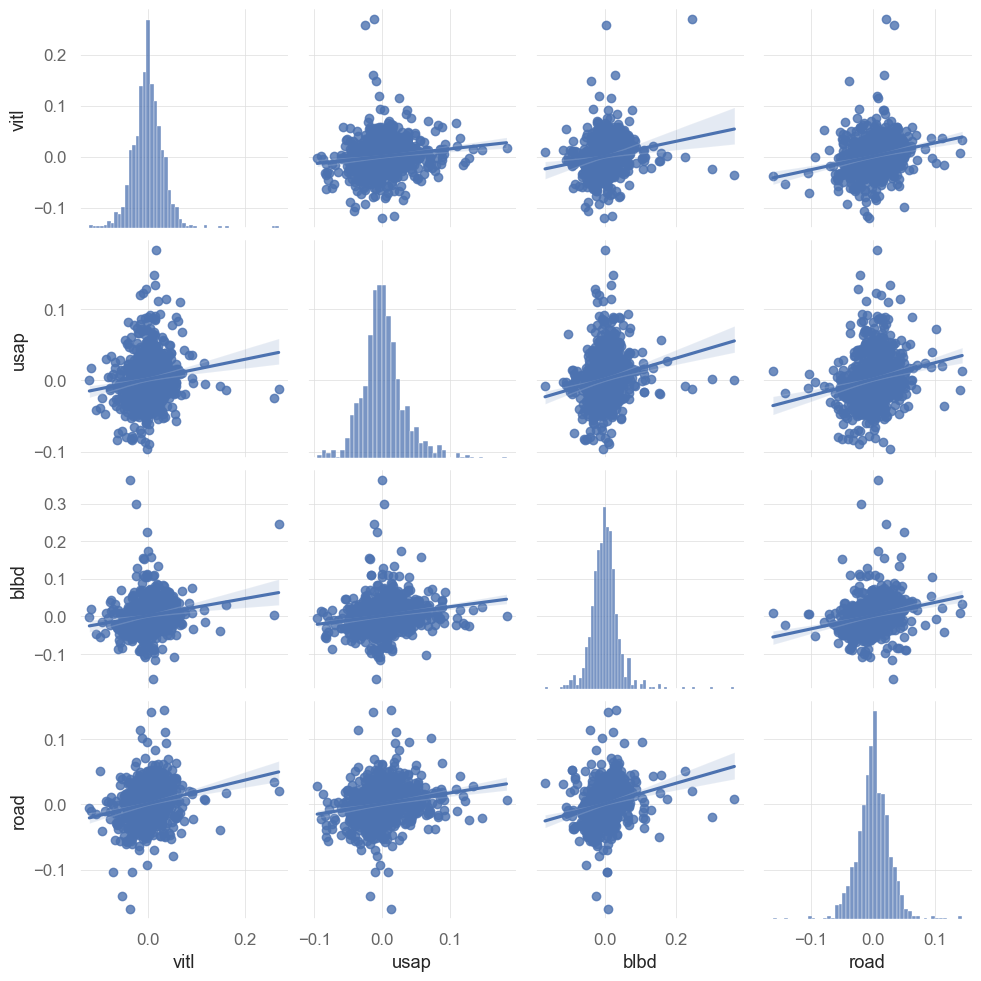

In [68]:
# Pairplots
sns.pairplot(merged_df, kind = 'reg')
plt.show()

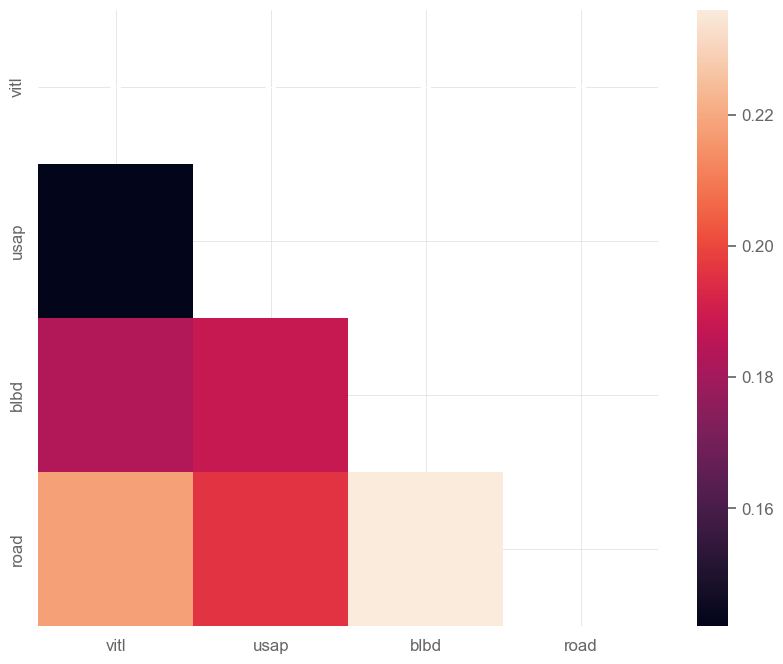

In [69]:
# Correlation Matrix
corr = merged_df.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask)

# Show the plot
plt.show()


As we can see, their correlation is not strong even their strongest one is road and blbd.
Hence no negative correlation exists in either of each pair
It's important to note that there is not any negative correlation among the assets above, which indicates that none of them acts to limit losses.

Beta and Alpha

Beta is a measure of a stock's volatility in comparison to the overall market. It indicates how much a stock's price is expected to move relative to market movements
Alpha measures a stock's performance relative to its expected return based on its Beta. It indicates whether a stock has outperformed or underperformed its expected performance. 

In [71]:
# Loading data from the SP500, the American benchmark
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2021-01-01':'2024-06-24']

# First localize the datetime index to a specific timezone (e.g., 'UTC') and then remove the timezone
if sp500.index.tz is None:
    sp500.index = sp500.index.tz_localize('UTC')
sp500.index = sp500.index.tz_convert(None)

sp500


[*********************100%%**********************]  1 of 1 completed


Date
2021-01-04   -0.014755
2021-01-05    0.007083
2021-01-06    0.005710
2021-01-07    0.014847
2021-01-08    0.005492
                ...   
2024-06-17    0.007664
2024-06-18    0.002521
2024-06-20   -0.002526
2024-06-21   -0.001562
2024-06-24   -0.003065
Name: Close, Length: 873, dtype: float64

In [73]:
# Removing indexes
sp500_no_index = sp500.reset_index(drop = True)
vitl_no_index = vitl.reset_index(drop = True)
usap_no_index = usap.reset_index(drop = True)
blbd_no_index = blbd.reset_index(drop = True)
road_no_index = road.reset_index(drop = True)

In [74]:
vitl_no_index

0     -0.009878
1      0.022745
2      0.035895
3      0.036912
4     -0.013440
         ...   
868    0.049270
869    0.001888
870   -0.025436
871    0.022958
872    0.056934
Name: Close, Length: 873, dtype: float64

In [75]:
sp500_no_index

0     -0.014755
1      0.007083
2      0.005710
3      0.014847
4      0.005492
         ...   
868    0.007664
869    0.002521
870   -0.002526
871   -0.001562
872   -0.003065
Name: Close, Length: 873, dtype: float64

In [76]:
# Fitting linear relation among Vital Farm's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = vitl_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('VITL beta: ', beta.round(3))
print('\nVITL alpha: ', alpha.round(3))



VITL beta:  [0.811]

VITL alpha:  [0.001]


In [77]:
# Fitting linear relation among USAP's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = usap_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('USAP beta: ', beta.round(3))
print('\nUSAP alpha: ', alpha.round(3))



USAP beta:  [0.683]

USAP alpha:  [0.002]


In [78]:
# Fitting linear relation among BLBD's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = blbd_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('BLBD beta: ', beta.round(3))
print('\nBLBD alpha: ', alpha.round(3))



BLBD beta:  [1.286]

BLBD alpha:  [0.001]


In [79]:
# Fitting linear relation among ROAD's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = road_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('ROAD beta: ', beta.round(3))
print('\nROAD alpha: ', alpha.round(3))



ROAD beta:  [1.155]

ROAD alpha:  [0.001]


As we can see, VITL and USAP has a beta less than 1, this means they are less volatile than the overall market, For investors seeking stability, a stock with a Beta less than 1 might be attractive because it indicates lower volatility compared to the market average.
For BLBD and ROAD, they have a beta greater than 1, This means they are more volatile than the overall market. For investors seeking higher returns and willing to accept higher risk, a stock with a Beta greater than 1 might be attractive because it indicates higher volatility compared to the market average.
While the Alpha is positive, its very small value indicates that the excess return is negligible. Investors might need to consider other factors such as the company's fundamentals and market outlook rather than relying solely on the excess return.
And there exists some hedging propertires since two of them have a high risk and other have a low risk.

Sharpe Ratio

In [82]:
# Calculating Sharpe ratio
print('\n')
print("Sharpe Ratio for VITL: ", qs.stats.sharpe(vitl).round(2))
print('\n')
print("Sharpe Ratio for USAP: ", qs.stats.sharpe(usap).round(2))
print('\n')
print("Sharpe Ratio for BLBD: ", qs.stats.sharpe(blbd).round(2))
print('\n')
print("Sharpe Ratio for ROAD: ", qs.stats.sharpe(road).round(2))




Sharpe Ratio for VITL:  0.57


Sharpe Ratio for USAP:  1.01


Sharpe Ratio for BLBD:  0.78


Sharpe Ratio for ROAD:  0.64


Vital Farms (VITL): With a Sharpe ratio of 0.57, it has a low risk-adjusted return, making it less attractive for risk-conscious investors.
Universal Stainless & Alloy Products Inc. (USAP): With a Sharpe ratio of 1.01, it has a good risk-adjusted return, making it relatively attractive.
Blue Bird Corporation (BLBD): With a Sharpe ratio of 0.78, it has a moderate risk-adjusted return, better than VITL but still below average.
Construction Partners Inc. (ROAD): With a Sharpe ratio of 0.64, it has a low risk-adjusted return, similar to VITL.
In conclusion, USAP stands out as the most attractive investment among the four based on its Sharpe ratio, indicating that it offers a good balance between risk and return. The other three stocks have Sharpe ratios below 1, suggesting that their risk-adjusted returns are less favorable. Investors should consider these ratios alongside other financial metrics and factors when making investment decisions.

Initial Conclusions
XXXXXXXXXXXXXXXXXXXXXXXXXXXX

Buidling and optimizing models

In [83]:
weights = [0.25, 0.25, 0.25, 0.25] # Defining weights for each stock
portfolio = vitl*weights[0] + usap*weights[1] + blbd*weights[2] + road*weights[3] # Creating portfolio multiplying each stock for its respective weight
portfolio # Displaying portfolio's daily returns

Date
2021-01-04   -0.020886
2021-01-05    0.021215
2021-01-06    0.047231
2021-01-07    0.053044
2021-01-08   -0.006524
                ...   
2024-06-17    0.021661
2024-06-18    0.009984
2024-06-20   -0.030440
2024-06-21   -0.002828
2024-06-24   -0.007291
Name: Close, Length: 873, dtype: float64

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2021-01-04   2021-01-04
End Period                 2024-06-24   2024-06-24
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          45.04%       230.7%
CAGR﹪                     7.68%        26.86%

Sharpe                     0.72         1.2
Prob. Sharpe Ratio         90.95%       98.8%
Smart Sharpe               0.71         1.18
Sortino                    1.04         1.85
Smart Sortino              1.02         1.82
Sortino/√2                 0.73         1.31
Smart Sortino/√2           0.72         1.29
Omega                      1.21         1.21

Max Drawdown               -25.43%      -50.78%
Longest DD Days            745          708
Volatility (ann.)          16.84%       33.53%
R^2                        0.24         0.24
Information Ratio          0.06         0.06
Calmar               

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-06-10  2022-07-14  2023-05-18   708    -50.783450        -50.014867
2  2021-03-17  2021-03-29  2021-06-08    84    -16.422898        -15.087368
3  2021-01-20  2021-01-29  2021-02-18    30    -12.234852        -11.832185
4  2023-08-04  2023-10-23  2023-11-02    91    -11.476769        -10.864418
5  2023-05-24  2023-07-14  2023-08-02    71     -8.562458         -8.176021

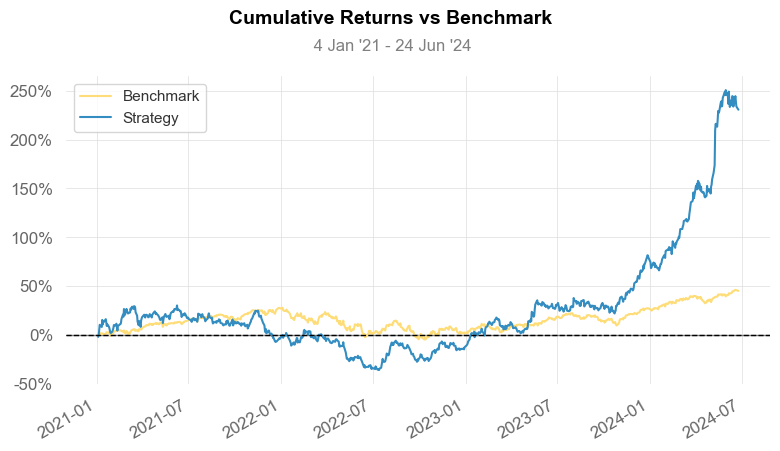

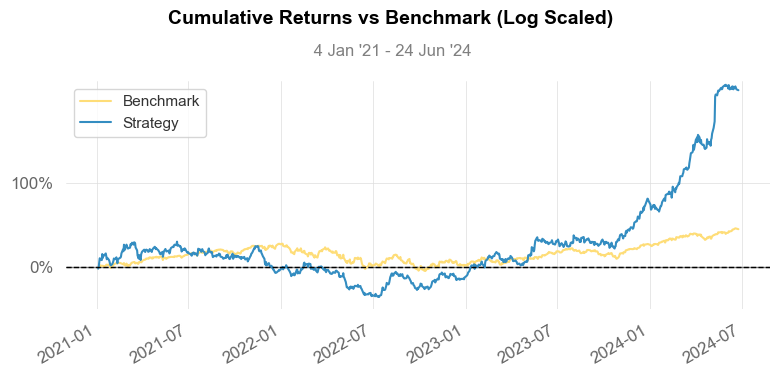

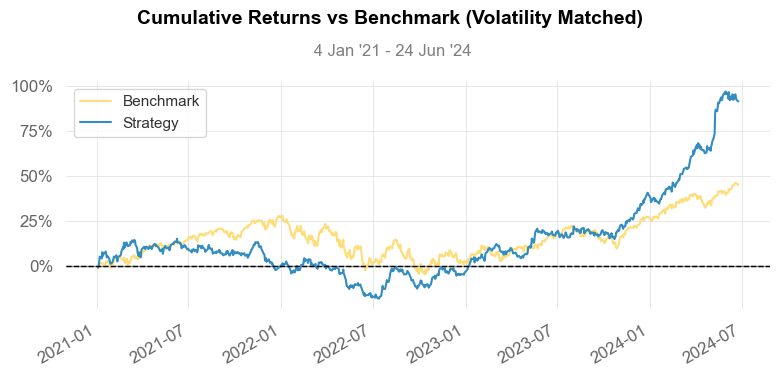

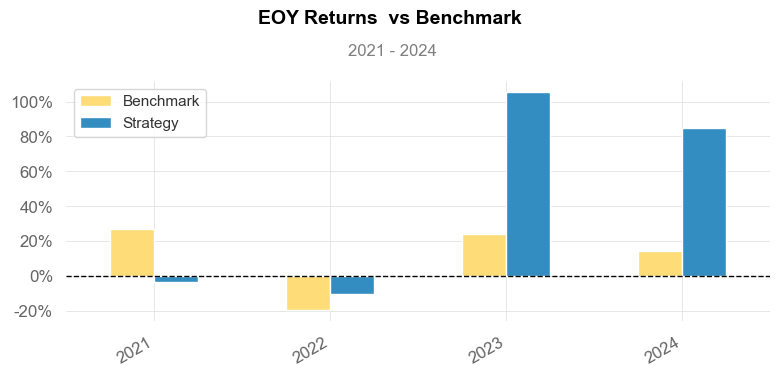

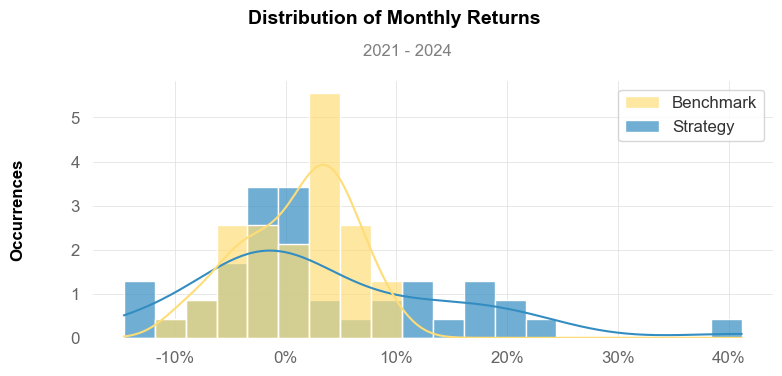

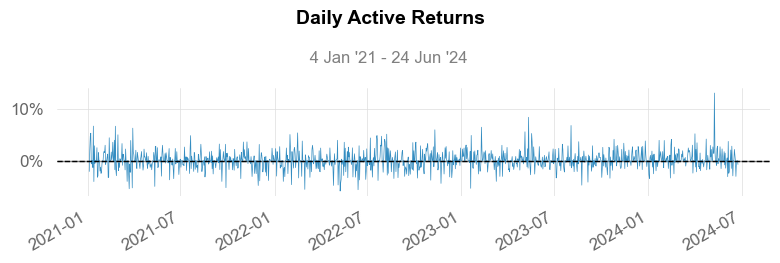

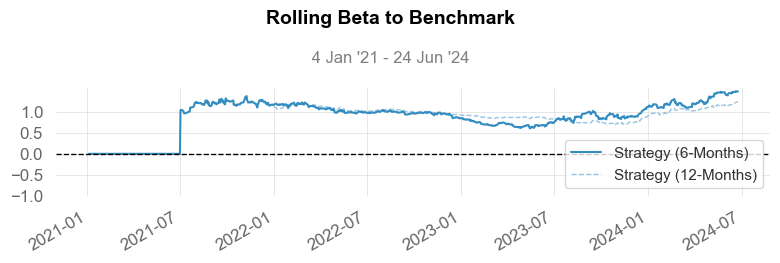

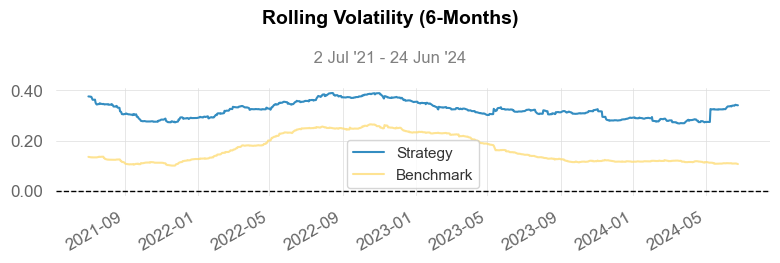

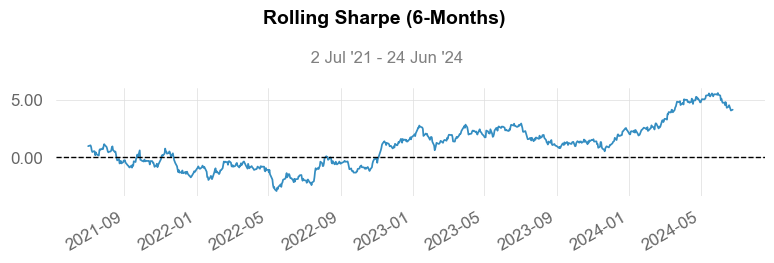

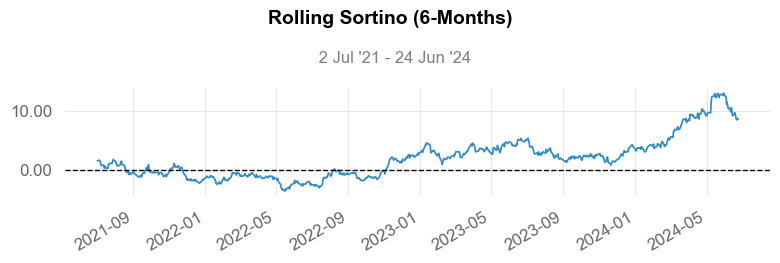

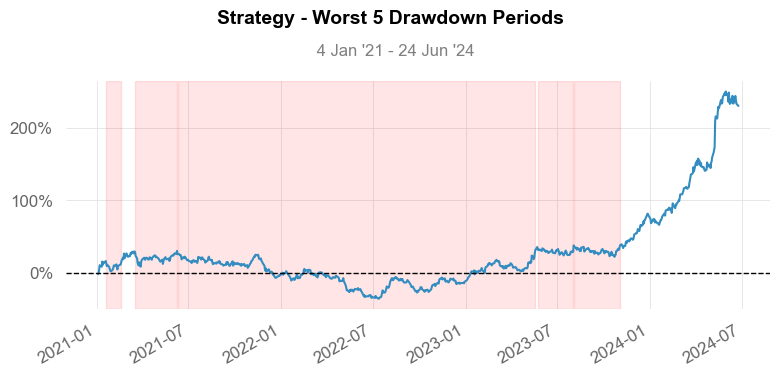

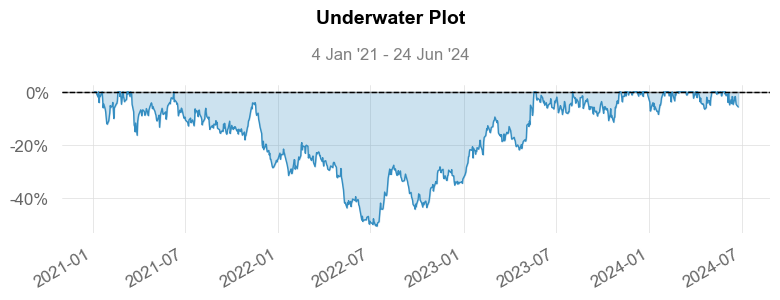

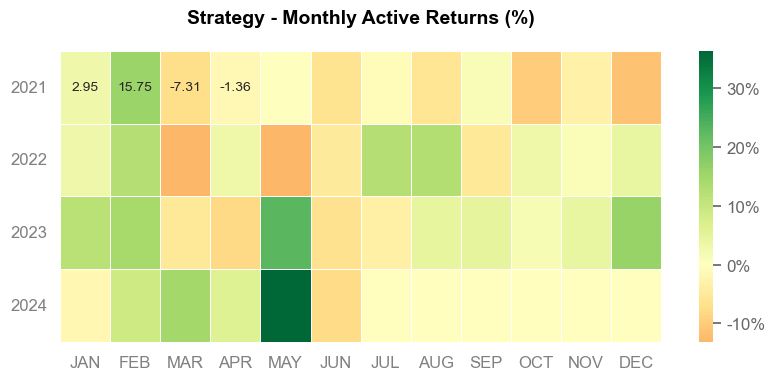

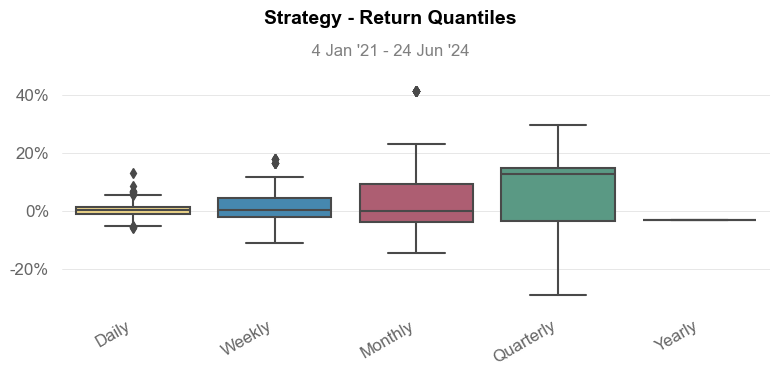

In [84]:
# Generating report on portfolio performance from Jan 1st, 2021 to June 25th 2024.
qs.reports.full(portfolio, benchmark = sp500)

综合分析
高回报与高风险: 投资组合在各个回报指标上显著优于基准，但伴随着更高的波动性和更大的最大回撤，表明投资组合的高回报是以承担更高风险为代价的。
风险调整后的优越性: 较高的夏普比率和索提诺比率表明，即使在考虑风险后，投资组合仍然表现出色。
恢复能力强: 投资组合的恢复因子较高，尽管经历了较大的回撤，但恢复速度较快。
超额回报: 正的 Alpha 表明投资组合在研究期间提供了超额回报，超越了市场基准。
投资建议
适合高风险偏好投资者: 由于投资组合具有较高的波动性和回撤，适合那些能够承担较高风险且追求高回报的投资者。
定期调整和监控: 由于投资组合波动性较大，建议投资者定期审查和调整投资组合，确保风险管理措施到位。
波动性：Beta 小于 1 表示投资组合的波动性小于市场，这意味着投资组合的价格波动较小，相对于市场更稳定。
超额回报：Alpha 为 0.3 表示投资组合在调整风险后，每单位风险的超额回报为 0.3%。这意味着投资组合不仅比市场波动性小，而且还能提供额外的回报。
总体而言，尽管投资组合的风险较高，但其显著的高回报和优越的风险调整后表现使其在研究期间成为一个成功的投资策略。

Optimizing Portfolio

Optimizing a portfolio involves selecting the optimal combination of assets and determining their respective weights to maximize returns and minimize risk. This process takes into account the historical performance of the assets, their correlations with each other, and other relevant factors such as market conditions and economic outlook. The goal is to create a well-diversified portfolio that balances risk and returns, aligns with the investor's risk tolerance, and meets their financial objectives. Techniques used in portfolio optimization include modern portfolio theory, which seeks to construct the efficient frontier of optimal portfolios offering the highest expected return for a given level of risk, and various other methods like minimum variance and maximum diversification strategies.

In [85]:
# Getting dataframes info for Stocks using yfinance
vitl_df = yf.download('VITL', start = '2021-01-01', end = '2024-06-24')
usap_df = yf.download('USAP', start = '2021-01-01', end = '2024-06-24')
blbd_df = yf.download('BLBD', start = '2021-01-01', end = '2024-06-24')
road_df = yf.download('ROAD', start = '2021-01-01', end = '2024-06-24')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [86]:
# Extracting Adjusted Close for each stock
vitl_df = vitl_df['Adj Close']
usap_df = usap_df['Adj Close']
blbd_df = blbd_df['Adj Close']
road_df = road_df['Adj Close']

In [87]:
# Merging and creating an Adj Close dataframe for stocks
df = pd.concat([vitl_df, usap_df, blbd_df, road_df], join='outer', axis=1)
df.columns = ['VITL', 'USAP', 'BLBD', 'ROAD']
df # Visualizing dataframe for input

VITL       USAP       BLBD       ROAD
Date                                                  
2021-01-04  25.059999   7.450000  17.860001  27.719999
2021-01-05  25.629999   7.440000  18.129999  29.059999
2021-01-06  26.549999   7.590000  18.530001  32.279999
2021-01-07  27.530001   8.460000  18.850000  33.680000
2021-01-08  27.160000   8.580000  18.400000  33.580002
...               ...        ...        ...        ...
2024-06-14  40.389999  30.799999  55.790001  56.200001
2024-06-17  42.380001  31.030001  55.889999  57.779999
2024-06-18  42.459999  31.030001  57.320000  58.500000
2024-06-20  41.380001  30.330000  54.630001  56.930000
2024-06-21  42.330002  30.059999  53.820000  56.330002

[872 rows x 4 columns]

In [88]:
# Importing libraries for portfolio optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

Markowitz Mean-Variance Optimization Model

The Markowitz Mean-Variance Optimization Model is a fundamental framework in portfolio management that aims to create an optimal investment portfolio by balancing risk and return. The model's core idea is to maximize the expected return for a given level of risk or minimize risk for a given level of expected return. This is achieved by calculating the expected returns of each asset, typically based on historical data, and assessing the risk using a covariance matrix that measures the volatilities and correlations between assets. By using these inputs, the model identifies the optimal weights for each asset in the portfolio to achieve the best possible risk-return trade-off, helping investors to make informed decisions that align with their risk tolerance and financial goals.

In [89]:
# Calculating the annualized expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(df) #expected returns
S = risk_models.sample_cov(df) #Covariance matrix

In [90]:
mu

VITL    0.163776
USAP    0.497204
BLBD    0.375953
ROAD    0.227710
dtype: float64

In [91]:
S

VITL      USAP      BLBD      ROAD
VITL  0.274682  0.039083  0.063003  0.049998
USAP  0.039083  0.263078  0.062731  0.043413
BLBD  0.063003  0.062731  0.425014  0.066516
ROAD  0.049998  0.043413  0.066516  0.188500

 maximization of the Sharpe ratio, achieved by using the max_sharpe method

In [92]:
# Optimizing for maximal Sharpe ratio
ef = EfficientFrontier(mu, S) # Providing expected returns and covariance matrix as input
weights = ef.max_sharpe() # Optimizing weights for Sharpe ratio maximization

clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

# Printing optimized weights and expected performance for portfolio
clean_weights

OrderedDict([('VITL', 0.0307),
             ('USAP', 0.58621),
             ('BLBD', 0.18642),
             ('ROAD', 0.19666)])

Overall Analysis
Diversification: Although USAP has the largest weight (58.62%), the portfolio is still somewhat diversified, with significant allocations to BLBD and ROAD as well.
Risk-Adjusted Returns: USAP receives the highest weight, suggesting it is expected to offer the best risk-adjusted returns. The optimization process considers the expected returns and risks of each asset to find the weight combination that maximizes the Sharpe ratio.
Small Allocation to VITL: VITL has the smallest weight at 3.07%, likely due to its lower expected returns or higher risk, making it less attractive in the context of maximizing the Sharpe ratio.
Conclusion
The weight allocation indicates that USAP is considered the most promising asset in terms of risk-adjusted returns, thus receiving the largest weight. Meanwhile, VITL's small allocation suggests it is less favorable in terms of risk-adjusted performance. This optimized weight distribution helps investors achieve a balance between maximizing returns and managing risk, thereby enhancing the overall performance of the portfolio.

create the new portfolio based on the model result to re-evaluate

In [93]:
new_weights = [0.0307, 0.58621, 0.18642, 0.19666]
optimized_portfolio = vitl * new_weights[0] + usap * new_weights[1] + blbd * new_weights[2] + road * new_weights[3]

# 显示优化后的投资组合每日回报率
optimized_portfolio

Date
2021-01-04   -0.016129
2021-01-05    0.012236
2021-01-06    0.038825
2021-01-07    0.080076
2021-01-08    0.002868
                ...   
2024-06-17    0.011753
2024-06-18    0.007278
2024-06-20   -0.028032
2024-06-21   -0.009350
2024-06-24   -0.033262
Name: Close, Length: 873, dtype: float64

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2021-01-04   2021-01-04
End Period                 2024-06-24   2024-06-24
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          230.7%       286.93%
CAGR﹪                     26.86%       30.88%

Sharpe                     1.2          1.22
Prob. Sharpe Ratio         98.8%        98.93%
Smart Sharpe               1.09         1.11
Sortino                    1.85         1.93
Smart Sortino              1.68         1.76
Sortino/√2                 1.31         1.37
Smart Sortino/√2           1.19         1.24
Omega                      1.22         1.22

Max Drawdown               -50.78%      -45.73%
Longest DD Days            708          708
Volatility (ann.)          33.53%       37.97%
R^2                        0.73         0.73
Information Ratio          0.02         0.02
Calmar            

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-06-10  2022-07-12  2023-05-18   708    -45.729354        -44.320549
2  2023-08-02  2023-10-23  2023-11-02    93    -17.269994        -16.854190
3  2021-01-13  2021-01-29  2021-02-12    31    -14.279741        -14.106525
4  2021-03-12  2021-03-24  2021-05-14    64    -12.730332        -12.673864
5  2024-05-29  2024-06-24  2024-06-24    27    -12.234822         -9.215131

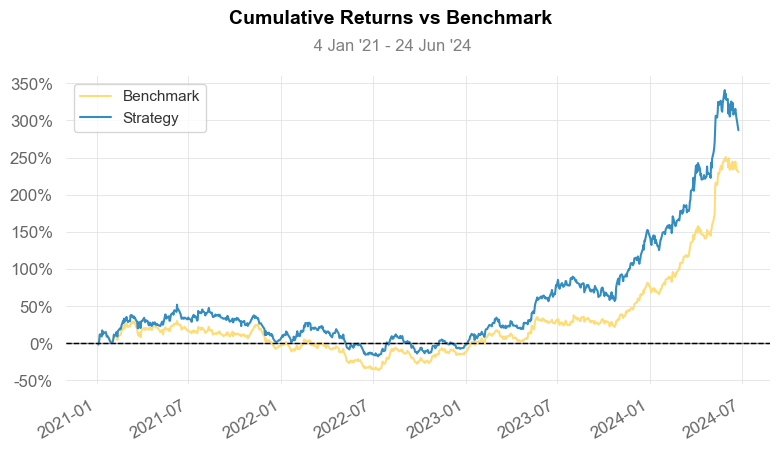

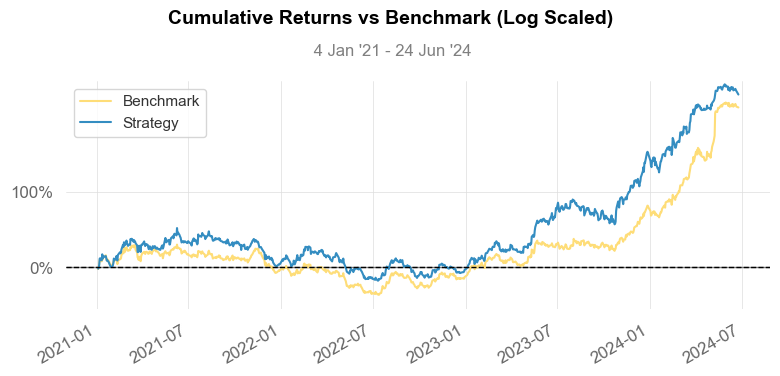

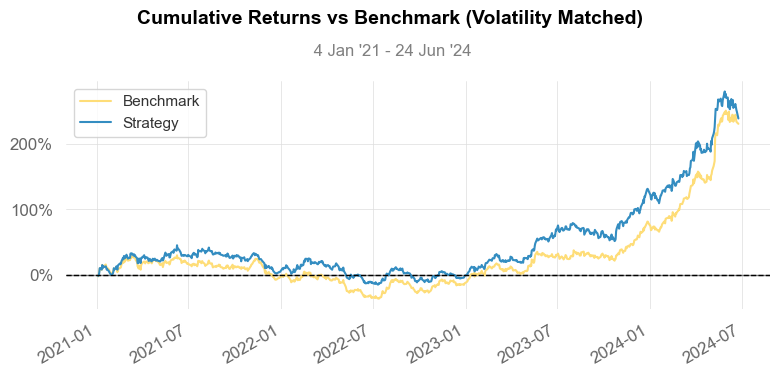

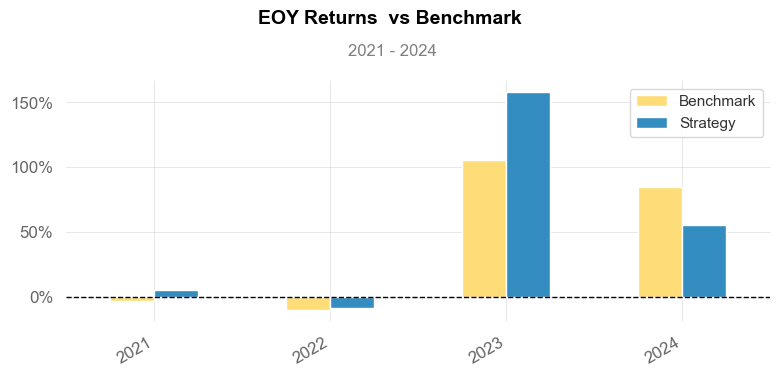

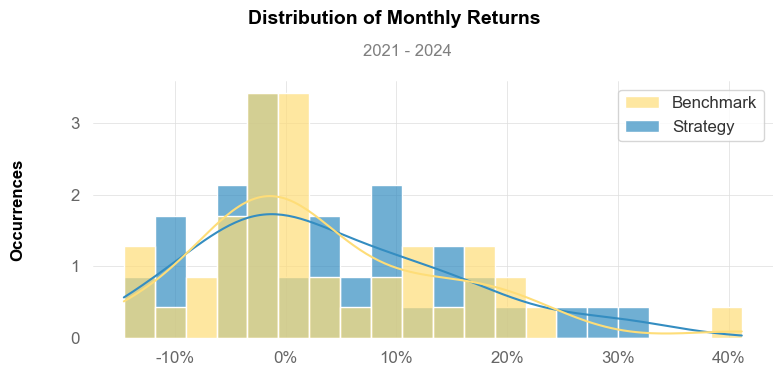

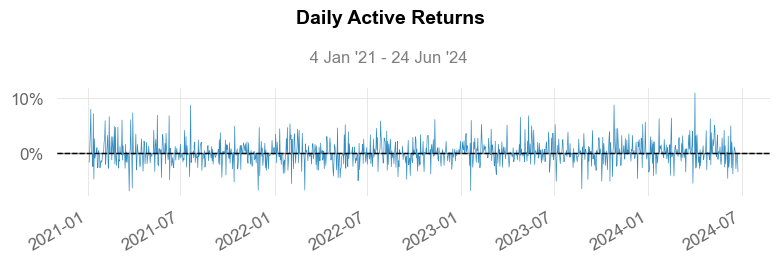

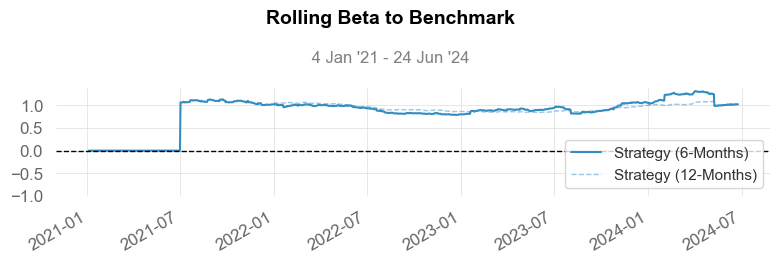

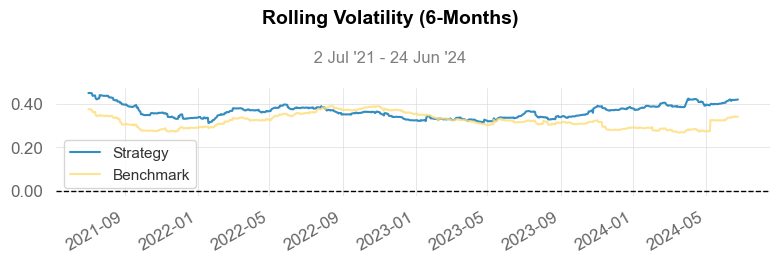

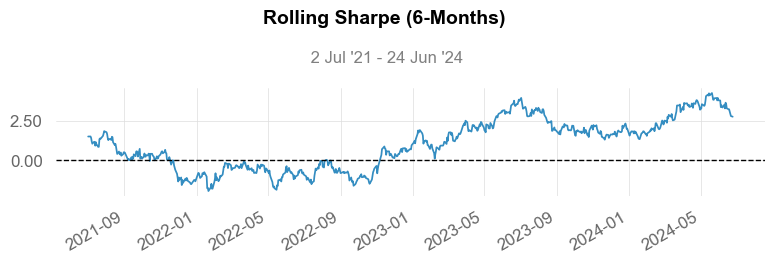

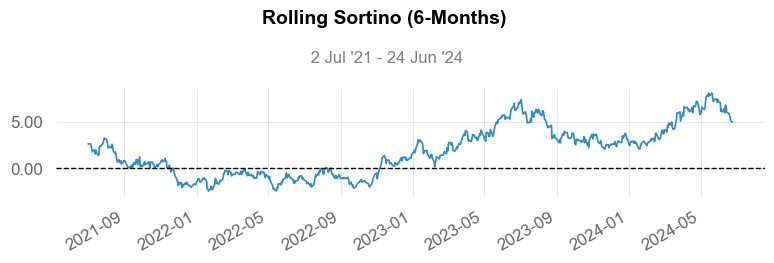

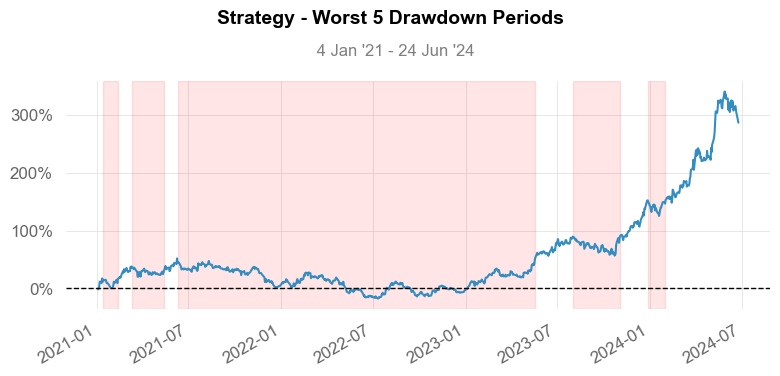

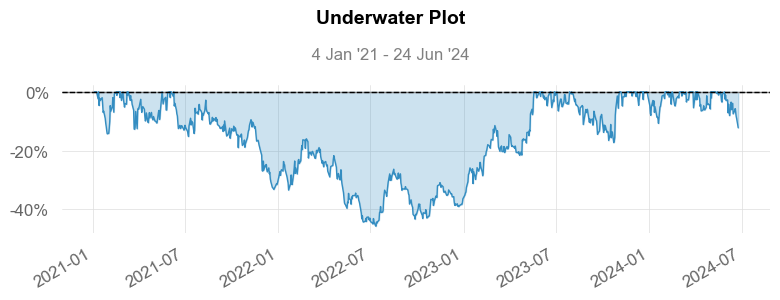

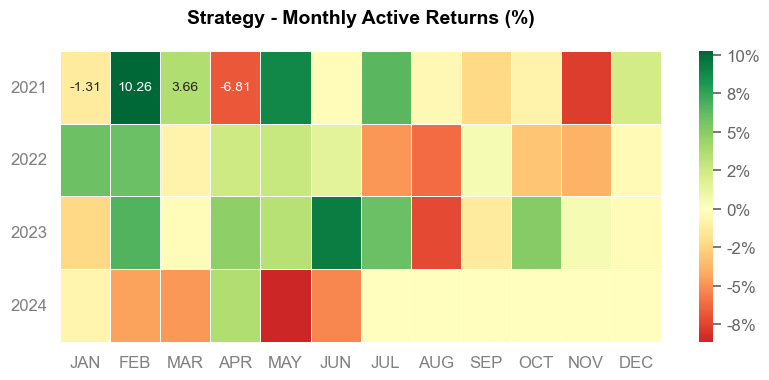

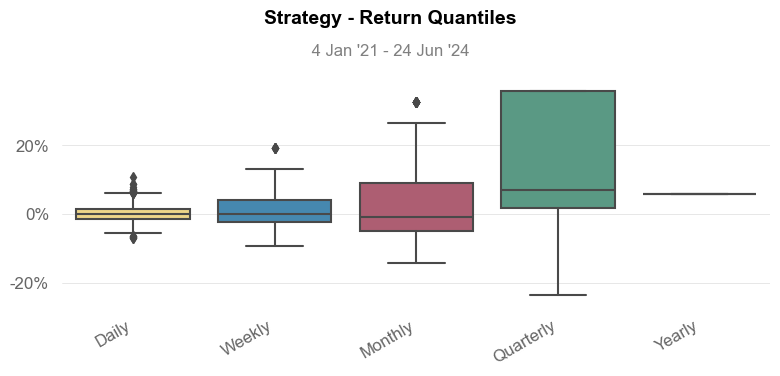

In [94]:
# Displaying new reports comparing the optimized portfolio to the first portfolio constructed
qs.reports.full(optimized_portfolio, benchmark = portfolio)

The optimized portfolio strategy demonstrates superior performance compared to the benchmark in terms of returns and risk-adjusted metrics. Despite higher volatility, the strategy effectively manages drawdowns and recovery, resulting in higher cumulative and annualized returns. The improved Sharpe and Sortino ratios, along with positive Alpha, indicate better risk-adjusted performance and the ability to generate excess returns. Overall, the strategy provides a balanced approach with higher potential returns while maintaining effective risk management.

Black-Litterman Allocation Model

The Black-Litterman Allocation Model, developed by Fischer Black and Robert Litterman, is an advanced method for asset allocation that blends market equilibrium with investor views to determine optimal portfolio weights. The model starts with a prior estimate of expected returns based on market data and risk aversion, then adjusts these estimates by incorporating the investor's specific views on expected returns, along with their confidence levels. These views can be either absolute (e.g., a specific return for a stock) or relative (e.g., one stock outperforming another). By combining the prior market-based estimates with the investor's views, weighted by their confidence, the model produces a new set of expected returns that are used to optimize the portfolio. This approach provides a systematic way to integrate subjective insights into the traditional mean-variance optimization framework, resulting in a more tailored and potentially more accurate portfolio allocation.

In [108]:
# Mapping assets
assets = ['VITL', 'USAP', 'BLBD', 'ROAD']

# Obtaining market cap for stocks
market_caps = {}
for asset in assets:
    ticker = yf.Ticker(asset)
    market_caps[asset] = ticker.info.get('marketCap')
    
market_caps # Visualizing market caps for stocks


{'VITL': 1921917056, 'USAP': 256993040, 'BLBD': 1744797440, 'ROAD': 2962296576}

In [109]:
# Obtaining closing prices for the SP500
market_prices = yf.download("^GSPC",start = '2021-01-01', end = '2024-06-24')['Adj Close']
market_prices # Visualizing closing prices for the SP500

[*********************100%%**********************]  1 of 1 completed


Date
2021-01-04    3700.649902
2021-01-05    3726.860107
2021-01-06    3748.139893
2021-01-07    3803.790039
2021-01-08    3824.679932
                 ...     
2024-06-14    5431.600098
2024-06-17    5473.229980
2024-06-18    5487.029785
2024-06-20    5473.169922
2024-06-21    5464.620117
Name: Adj Close, Length: 872, dtype: float64

In [110]:
# Obtaining market-implied risk aversion, the delta
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta # Visualizing delta

3.773614882137457

In [112]:
# Visualizing the covariance matrix
S

VITL      USAP      BLBD      ROAD
VITL  0.274682  0.039083  0.063003  0.049998
USAP  0.039083  0.263078  0.062731  0.043413
BLBD  0.063003  0.062731  0.425014  0.066516
ROAD  0.049998  0.043413  0.066516  0.188500

In [113]:
# Changing columns and index to uppercase so it matches market_caps
S.index = S.index.str.upper()
S.columns = S.columns.str.upper()
S

VITL      USAP      BLBD      ROAD
VITL  0.274682  0.039083  0.063003  0.049998
USAP  0.039083  0.263078  0.062731  0.043413
BLBD  0.063003  0.062731  0.425014  0.066516
ROAD  0.049998  0.043413  0.066516  0.188500

In [114]:
# Obtaining Prior estimates
prior = black_litterman.market_implied_prior_returns(market_caps, delta, S)
prior # Visualizing prior estimates

VITL    0.456216
USAP    0.228671
BLBD    0.609558
ROAD    0.448380
dtype: float64

Now that we have our prior estimates for each stock, we can now provide the model our views on these stocks and our confidence levels in our views.

In [117]:
# BLBD will raise by 15%
# USAP will raise by 6%
# VITL will outperform ROAD by 5%
Q = np.array([0.15, 0.06, 0.05])

In [118]:
# Linking views to assets
P = np.array([
    [0,0,1,0], # BLBD = 0.15
    [0,1,0,0], # USAP = 0.06
    [1,0,0,-1] # VITL > ROAD by 0.05
])

In [123]:
# Providing confidence levels
# Closer to 0.0 = Low confidence
# Closer to 1.0 = High confidence
confidences = [0.9,
               0.6,
               0.2]

In [124]:
# Creating model
bl = BlackLittermanModel(S, # Covariance Matrix
                         pi = prior, # Prior expected returns
                         Q = Q, # Vector of views
                         P = P, # Matrix mapping the views
                         omega = 'idzorek', # Method to estimate uncertainty level of the views based on historical data
                         view_confidences = confidences) # Confidences

In [125]:
rets = bl.bl_returns() # Calculating Expected returns
ef = EfficientFrontier(rets, S) # Optimizing asset allocation

In [126]:
ef.max_sharpe() # Optimizing weights for maximal Sharpe ratio
weights = ef.clean_weights() # Cleaning weights
weights # Printing weights

OrderedDict([('VITL', 0.40124),
             ('USAP', 0.0),
             ('BLBD', 0.00172),
             ('ROAD', 0.59704)])

In [127]:
# Building Black-Litterman portfolio
black_litterman_weights = [0.40124,
                          0.0,
                          0.00172,
                          0.59704]
black_litterman_portfolio = vitl*black_litterman_weights[0] + usap*black_litterman_weights[1] + blbd*black_litterman_weights[2] + road*black_litterman_weights[3]


In [128]:
# Black-Litterman Portfolio daily returns
black_litterman_portfolio

Date
2021-01-04   -0.032510
2021-01-05    0.038014
2021-01-06    0.080596
2021-01-07    0.040734
2021-01-08   -0.007206
                ...   
2024-06-17    0.036557
2024-06-18    0.008241
2024-06-20   -0.026310
2024-06-21    0.002894
2024-06-24    0.010729
Name: Close, Length: 873, dtype: float64

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2021-01-04   2021-01-04
End Period                 2024-06-24   2024-06-24
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          230.7%       114.12%
CAGR﹪                     26.86%       16.35%

Sharpe                     1.2          0.78
Prob. Sharpe Ratio         98.8%        92.74%
Smart Sharpe               1.19         0.78
Sortino                    1.85         1.16
Smart Sortino              1.85         1.16
Sortino/√2                 1.31         0.82
Smart Sortino/√2           1.31         0.82
Omega                      1.14         1.14

Max Drawdown               -50.78%      -52.82%
Longest DD Days            708          1059
Volatility (ann.)          33.53%       36.83%
R^2                        0.59         0.59
Information Ratio          -0.03        -0.03
Calmar          

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-01-13  2022-06-29  2023-12-07  1059    -52.818827        -51.887133
2  2024-04-08  2024-04-19  2024-05-06    29     -8.169727         -7.552334
3  2024-05-28  2024-06-11  2024-06-24    28     -6.986240         -6.591255
4  2024-02-09  2024-02-13  2024-02-20    12     -6.606530         -3.698463
5  2023-12-29  2024-01-03  2024-01-31    34     -6.450606         -5.778102

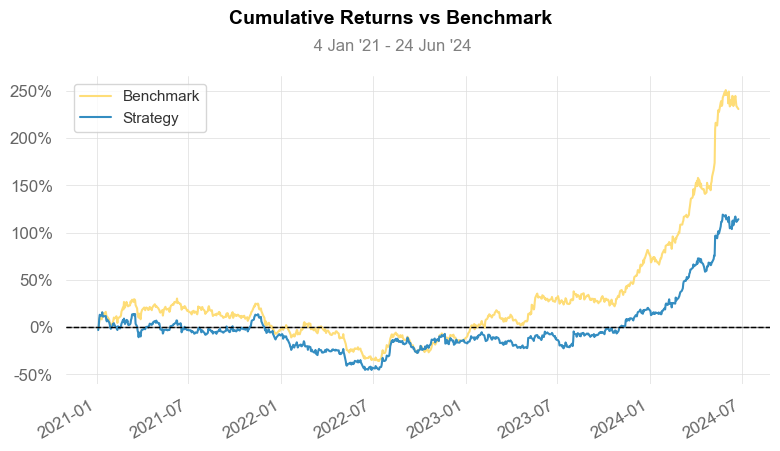

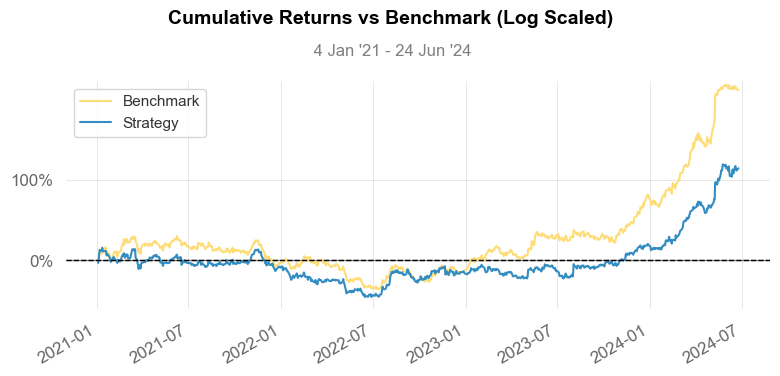

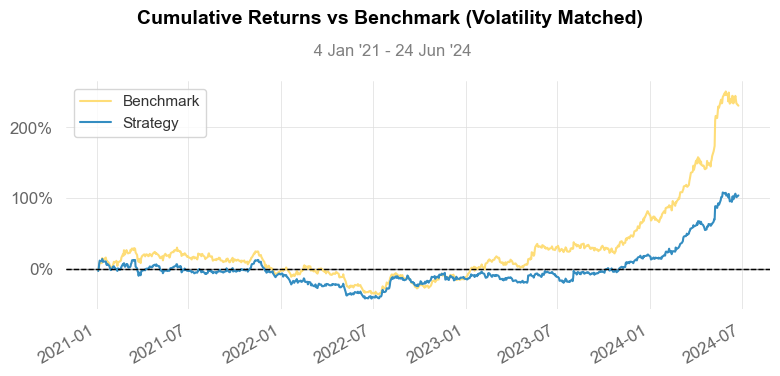

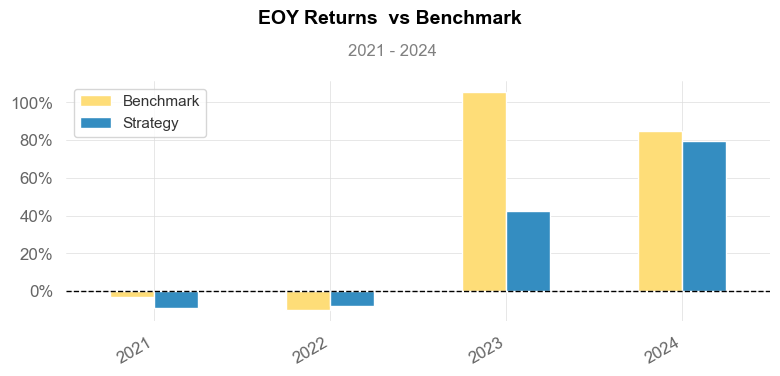

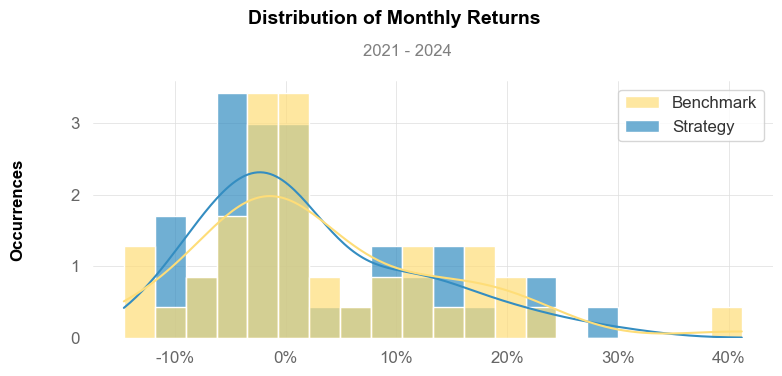

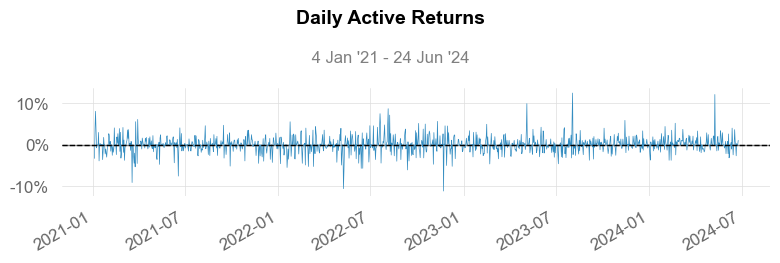

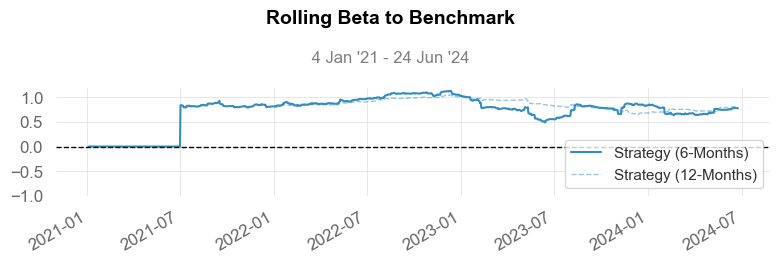

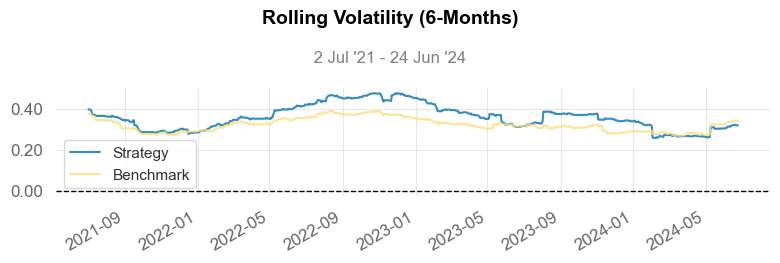

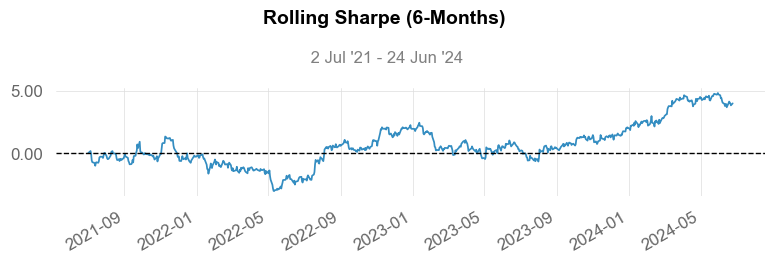

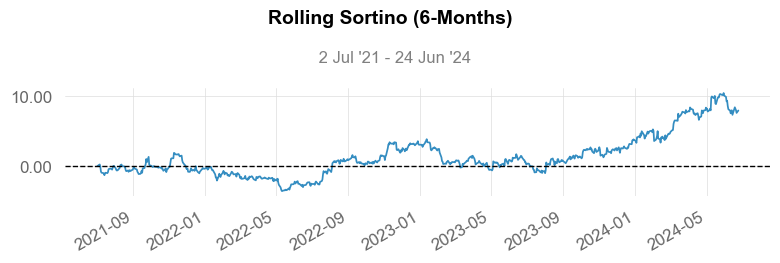

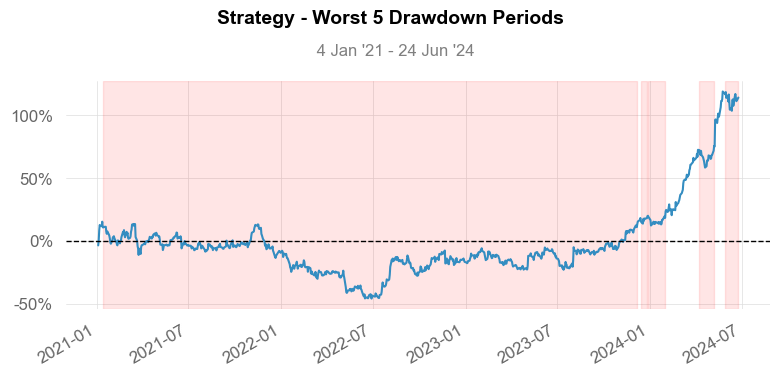

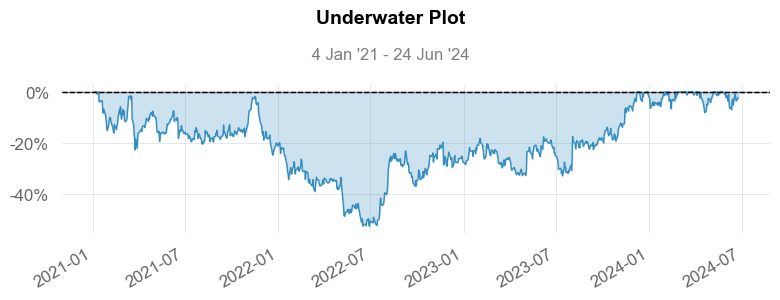

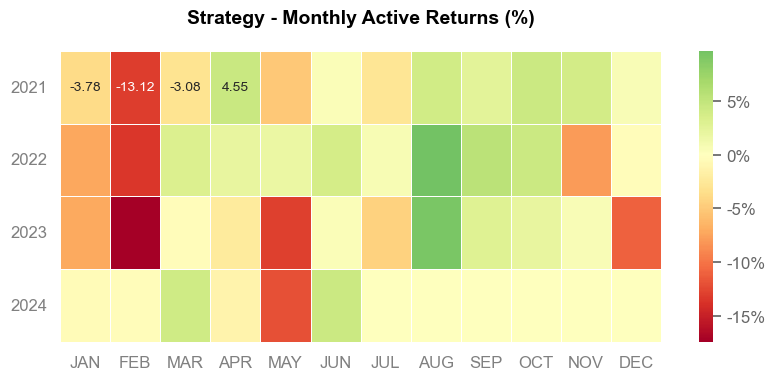

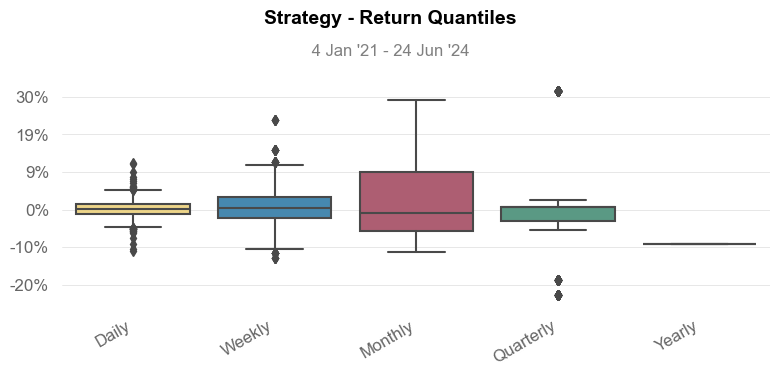

In [129]:
# Comparing Black-Litterman portfolio to the original portfolio
qs.reports.full(black_litterman_portfolio, benchmark = portfolio)

Although the Black-Litterman model offers a method to integrate investor views with market data for portfolio optimization, in this case, the original portfolio outperformed the optimized portfolio across several key performance metrics. This suggests that in practical application, the performance of the optimization model can be influenced by market conditions and the accuracy of input data.

The original portfolio's superior performance in terms of cumulative return, CAGR, Sharpe ratio, lower volatility, and more stable returns highlights the importance of careful data and assumption management when applying sophisticated financial models.

1. Risk and Return
Markowitz Model (Updated): The optimized portfolio from the Markowitz Mean-Variance Model significantly outperformed the S&P 500 benchmark in terms of cumulative return (286.93% vs. 230.7%) and CAGR (30.88% vs. 26.86%). This indicates that the Markowitz strategy provided superior overall returns.
Black-Litterman Model: The optimized portfolio showed a lower cumulative return (114.12%) and CAGR (16.35%) compared to the benchmark, indicating underperformance relative to the market.
2. Risk-Adjusted Performance
Markowitz Model (Updated): The Sharpe ratio of 1.22 suggests better risk-adjusted returns compared to the benchmark (1.2).
Black-Litterman Model: The Sharpe ratio of 0.78 is lower, indicating that the portfolio provided lower returns for a given level of risk compared to both the Markowitz strategy and the benchmark.
3. Volatility and Maximum Drawdown
Markowitz Model (Updated): Demonstrated higher volatility (37.97%) compared to the benchmark (33.53%), but experienced a smaller maximum drawdown (-45.73% vs. -50.78%), suggesting better resilience during market downturns.
Black-Litterman Model: Showed higher volatility (36.83%) and a slightly larger maximum drawdown (-52.82%), indicating greater price fluctuations and deeper drawdowns.
4. Extreme Value Risk
Markowitz Model (Updated): A lower kurtosis (0.97) suggests fewer extreme values and outliers in the returns distribution compared to the benchmark (1.77).
Black-Litterman Model: Higher kurtosis (3.29) indicates a higher likelihood of extreme returns, implying increased risk due to more frequent outliers.
Final Conclusion
Performance Superiority: The updated Markowitz Mean-Variance Model significantly outperformed both the S&P 500 benchmark and the Black-Litterman Model in terms of cumulative return, CAGR, and Sharpe ratio. This indicates that the Markowitz strategy provided superior overall returns and better risk-adjusted performance.
Risk Considerations: The Black-Litterman Model, despite its aim to incorporate investor views and market data, underperformed in this case. Its higher volatility, larger drawdowns, and higher kurtosis suggest increased risk and less stable returns.
Practical Implications: While the Black-Litterman Model offers a sophisticated approach to incorporating qualitative views and market insights, its effectiveness heavily depends on the accuracy of these inputs and the assumptions used. The Markowitz Model's straightforward approach to diversification and risk-return optimization proved more effective in this comparison.
The results highlight the importance of careful consideration of model inputs and assumptions in portfolio optimization. The Markowitz Mean-Variance Model, with its focus on historical data and risk-return trade-offs, demonstrated superior performance. However, the Black-Litterman Model remains valuable for incorporating qualitative views and market insights, potentially performing better under different market conditions or with more precise inputs.

1. 风险与回报
Markowitz模型 (更新后)：Markowitz均值-方差模型优化的投资组合在累积回报率（286.93% vs. 230.7%）和复合年增长率（30.88% vs. 26.86%）方面显著优于S&P 500基准。这表明Markowitz策略提供了更高的整体回报。
Black-Litterman模型：优化后的投资组合显示较低的累积回报率（114.12%）和CAGR（16.35%），相对于市场表现不佳。
2. 风险调整后的表现
Markowitz模型 (更新后)：夏普比率为1.22，表明与基准相比具有更好的风险调整后回报。
Black-Litterman模型：夏普比率为0.78，表明相比Markowitz策略和基准，投资组合在相同风险水平下提供了较低的回报。
3. 波动性和最大回撤
Markowitz模型 (更新后)：尽管波动率较高（37.97% vs. 33.53%），但最大回撤较小（-45.73% vs. -50.78%），显示在市场下跌期间具有更好的弹性。
Black-Litterman模型：波动率较高（36.83%）且最大回撤较大（-52.82%），表明价格波动更大且经历了更深的回撤。
4. 极端值风险
Markowitz模型 (更新后)：较低的峰度（0.97）表明收益分布中极端值和异常值较少，相比基准（1.77）。
Black-Litterman模型：较高的峰度（3.29）表示收益中极端值的可能性更高，意味着由于异常值的频率增加，风险更高。
最终结论
性能优越性：更新后的Markowitz均值-方差模型在累积回报率、CAGR和夏普比率方面显著优于S&P 500基准和Black-Litterman模型。这表明Markowitz策略提供了更高的整体回报和更好的风险调整后表现。
风险考量：尽管Black-Litterman模型旨在整合投资者观点和市场数据，但在本案例中表现不佳。其更高的波动性、更大的回撤和更高的峰度表明风险增加和收益的不稳定性。
实际应用：虽然Black-Litterman模型为整合定性观点和市场洞察提供了一个复杂的方法，但其有效性在很大程度上取决于这些输入的准确性和假设的使用。Markowitz模型直接的多样化和风险回报优化方法在此比较中证明了更高的效力。
这些结果强调了在投资组合优化中仔细考虑模型输入和假设的重要性。Markowitz均值-方差模型，侧重于历史数据和风险回报权衡，在本案例中表现优越。然而，Black-Litterman模型仍然是一个有价值的工具，用于整合定性观点和市场洞察，并在不同的市场条件或更精确的输入下可能表现更好。








